### imports

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontManager

### Data Processing

In [4]:


overall_data = pd.read_excel('tfcu_member.xlsx', index_col=0, sheet_name='KPI Data')
df_ = overall_data.drop(overall_data.index[0:3])
df = df_.drop(columns=['Unnamed: 10'])
df_time = df[['Week','Member Retention',
       'Employee Retention', 'Member Satisfaction NPS', 'Fraud rate',
       'Employee satisfaction', 'Number of Employee Relations Issues',
       '# of Member complaints', 'Member acquisition cost (CAC)',
       'Number of Compliance Issues', 'Compliance Investigation Cycle Time',
       'Decline rate', 'Financial impact due to attacks',
       'Attempted vs Fraudulent Transactions', 'Final Approval rate',
       'Fraudulent Vs Declined Transactions', 'System Uptime',
       'Severity of attacks', 'Mean Time Between Failures (MTBF)',
       'Cost per incident', 'Number of cybersecurity incidents reported'
             ]].groupby(['Week']).mean()

In [9]:
df_time.head()

Member Retention  Employee Retention  Member Satisfaction NPS  \
Week                                                                   
WK 01           74.3875             75.0200                  62.3600   
WK 02           74.4050             74.3275                  62.0125   
WK 03           73.1150             75.1950                  62.3650   
WK 04           75.2650             74.0125                  62.4525   
WK 05           74.3925             73.9400                  63.4925   

       Fraud rate  Employee satisfaction  Number of Employee Relations Issues  \
Week                                                                            
WK 01    0.475584                 5.3525                                2.915   
WK 02    0.473602                 5.6400                                3.060   
WK 03    0.505365                 5.6150                                3.040   
WK 04    0.462778                 5.6700                                3.025   
WK 05    0.507319                 5.6950                                2.905   

       # of Member complaints  Member acquisition cost (CAC)  \
Week                                                           
WK 01                 10.5675                        86.5000   
WK 02                  9.8150                        86.2725   
WK 03                 10.3625                        88.7375   
WK 04                  9.6250                        88.8675   
WK 05                  9.6375                        86.5575   

       Number of Compliance Issues  Compliance Investigation Cycle Time  \
Week                                                                      
WK 01                       2.4900                               18.310   
WK 02                       2.4675                               18.240   
WK 03                       2.4900                               19.195   
WK 04                       2.3250                               19.655   
WK 05                       2.4025                               18.510   

       Decline rate  Financial impact due to attacks  \
Week                                                   
WK 01        7.7450                       14709.1000   
WK 02        8.1175                       15483.0525   
WK 03        8.0750                       14896.3150   
WK 04        8.0200                       14942.6750   
WK 05        8.1950                       14797.1975   

       Attempted vs Fraudulent Transactions  Final Approval rate  \
Week                                                               
WK 01                                8.5850              79.6875   
WK 02                                8.4250              80.2550   
WK 03                                8.4125              79.9725   
WK 04                                8.5450              80.0600   
WK 05                                8.4325              79.9300   

       Fraudulent Vs Declined Transactions  System Uptime  \
Week                                                        
WK 01                              79.6875        94.3775   
WK 02                              80.2550        94.8075   
WK 03                              79.9725        94.4925   
WK 04                              80.0600        94.5500   
WK 05                              79.9300        94.6250   

       Severity of attacks  Mean Time Between Failures (MTBF)  \
Week                                                            
WK 01               5.4725                            55.2675   
WK 02               5.3800                            54.9450   
WK 03               5.5450                            56.0750   
WK 04               5.3300                            57.5600   
WK 05               5.6775                            56.4950   

       Cost per incident  Number of cybersecurity incidents reported  
Week                                                                  
WK 01          7535.7250                                      2

### Correlation

#### Pearson Correlation

In [10]:
corr = df_time.corr(method = 'pearson')

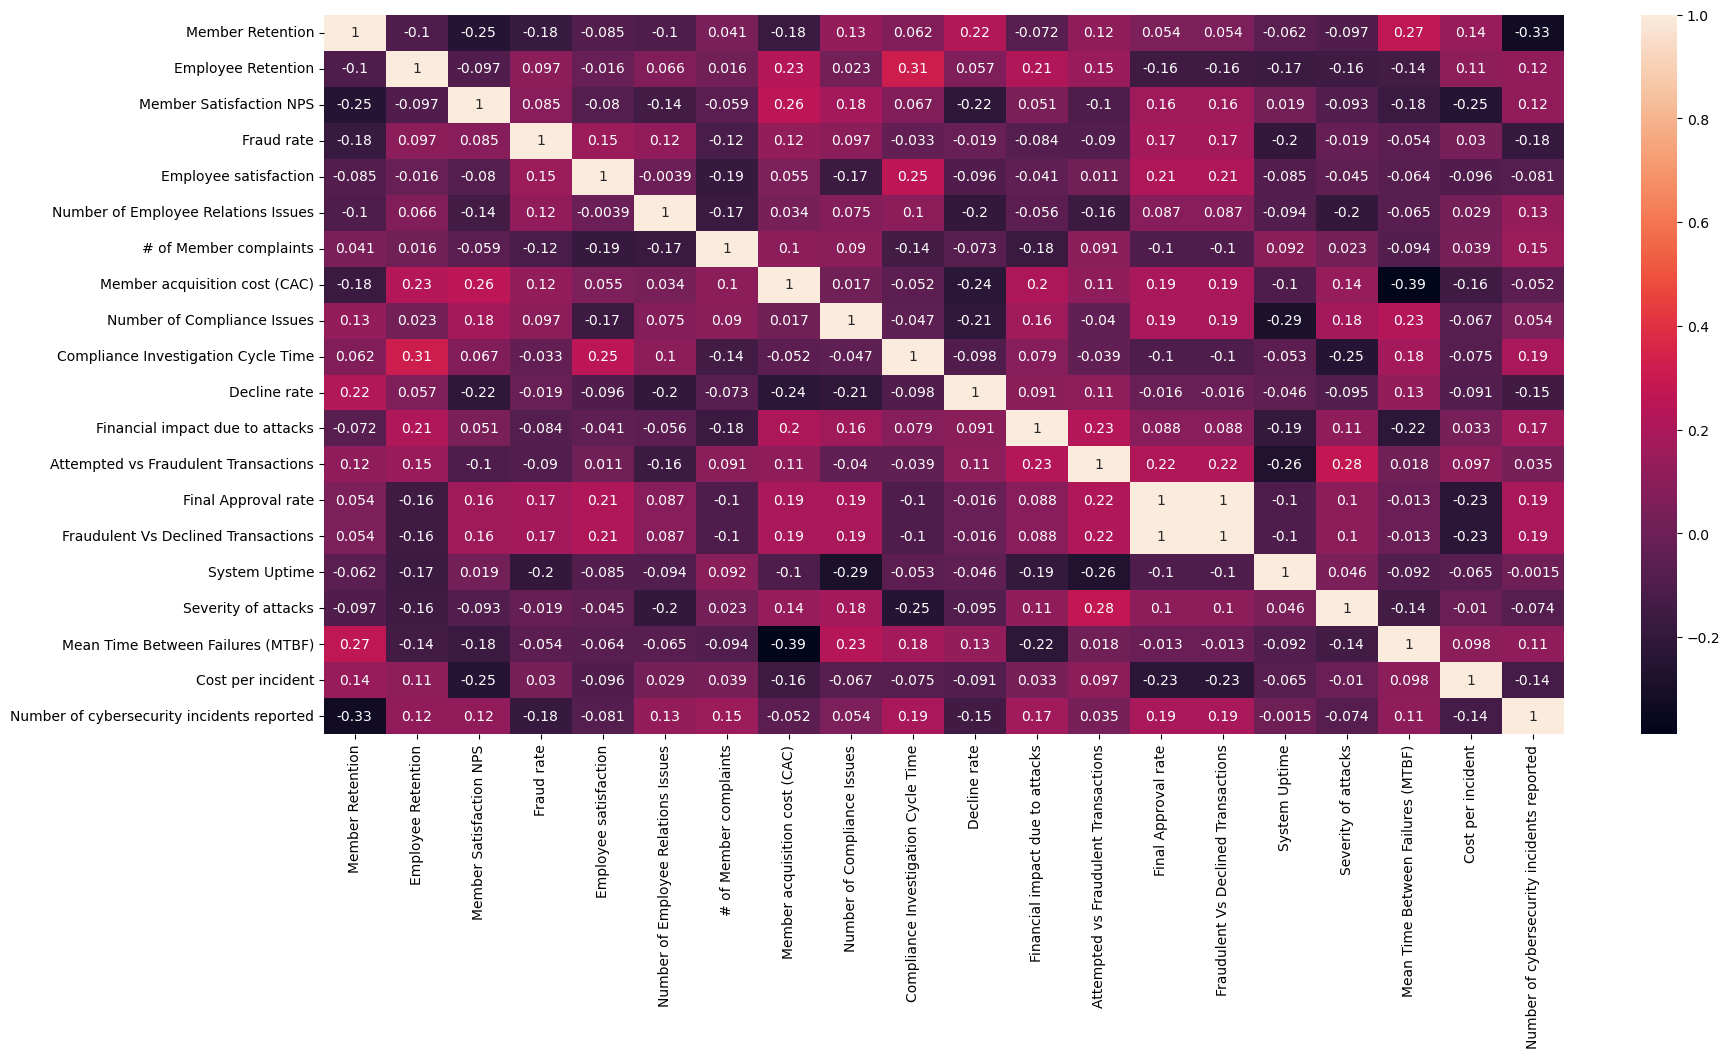

In [11]:
fontsize_pt = FontManager().get_default_size()
dpi = 72.27

# comput the matrix height in points and inches
matrix_height_pt = fontsize_pt * df_time.shape[0]
matrix_height_in = matrix_height_pt / dpi

# compute the required figure height 
top_margin = 0.04  # in percentage of the figure height
bottom_margin = 0.04 # in percentage of the figure height
figure_height = matrix_height_in / (1 - top_margin - bottom_margin)



fig, ax = plt.subplots(
        figsize=(20,figure_height), 
        gridspec_kw=dict(top=1-top_margin, bottom=bottom_margin))


ax = sns.heatmap(corr, ax=ax,  annot=True)

#### Threshold to view only high correlation data

In [12]:
lower_threshold = -0.3
upper_threshold = 0.3
updated_corr = corr.copy()
updated_corr = updated_corr.applymap(lambda x: 0 if lower_threshold <= x <= upper_threshold else x)

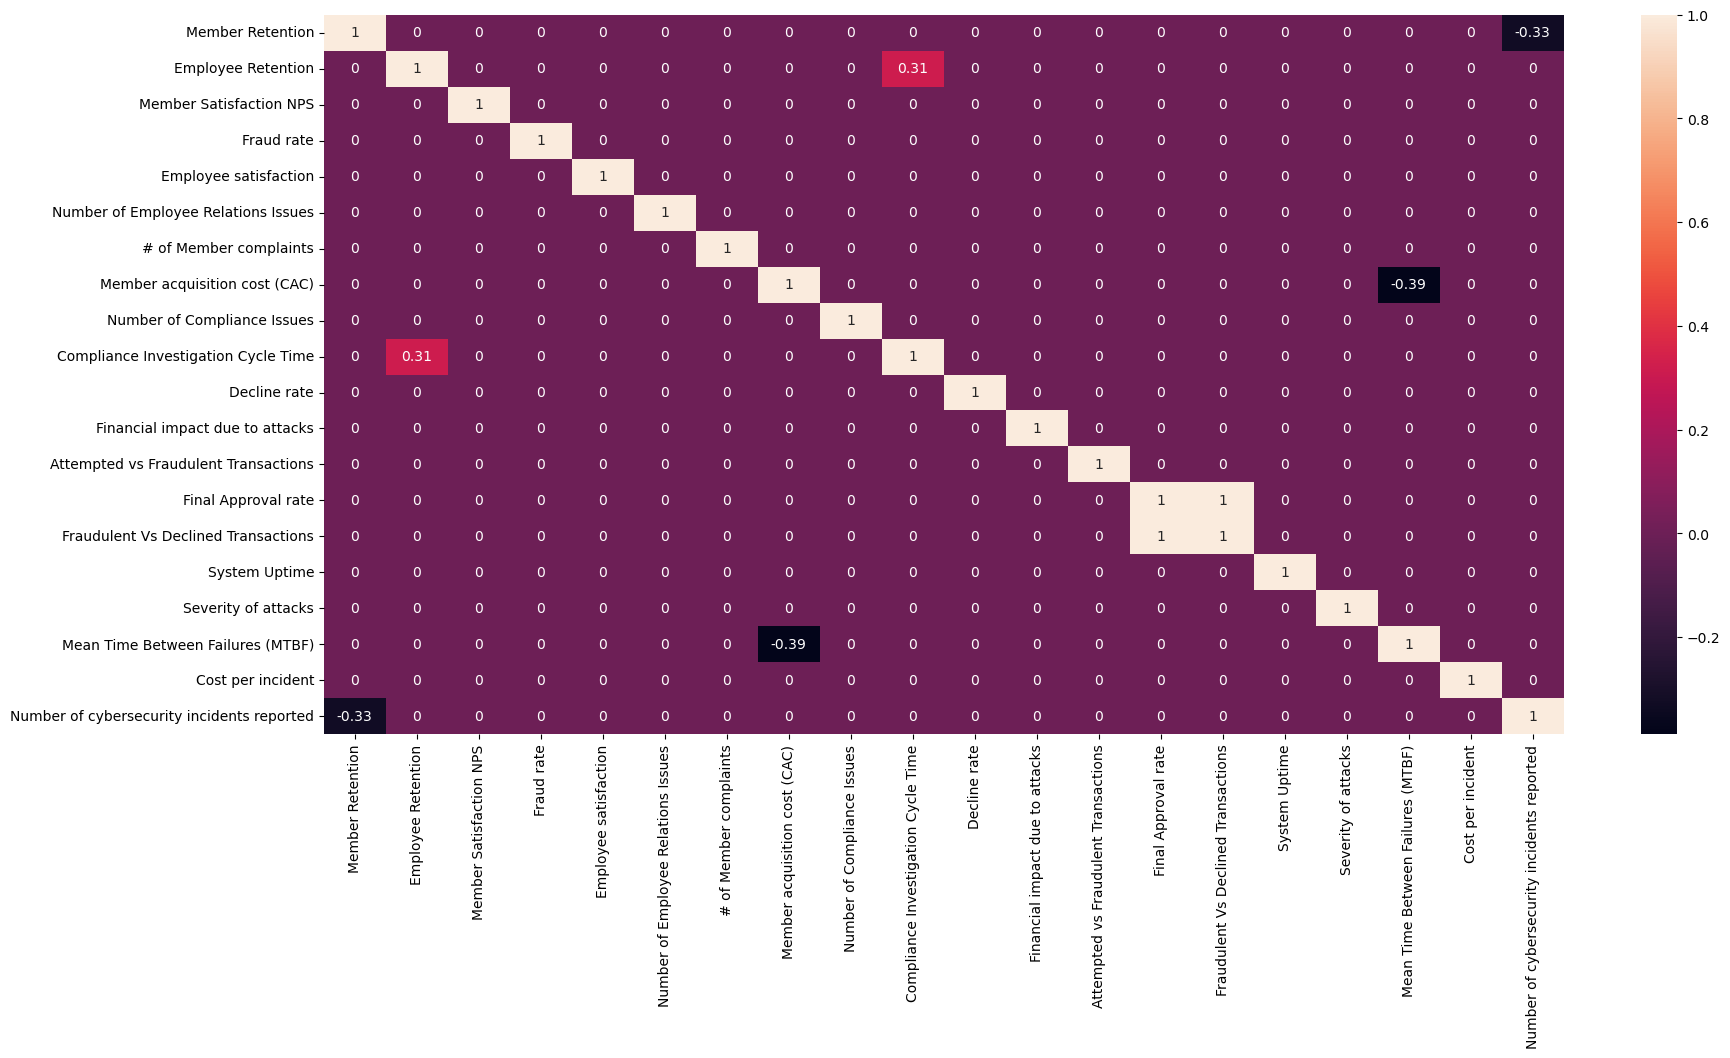

In [13]:

fig, ax = plt.subplots(
        figsize=(20,figure_height), 
        gridspec_kw=dict(top=1-top_margin, bottom=bottom_margin))


ax = sns.heatmap(updated_corr, ax=ax,  annot=True)

#### spearman correlation

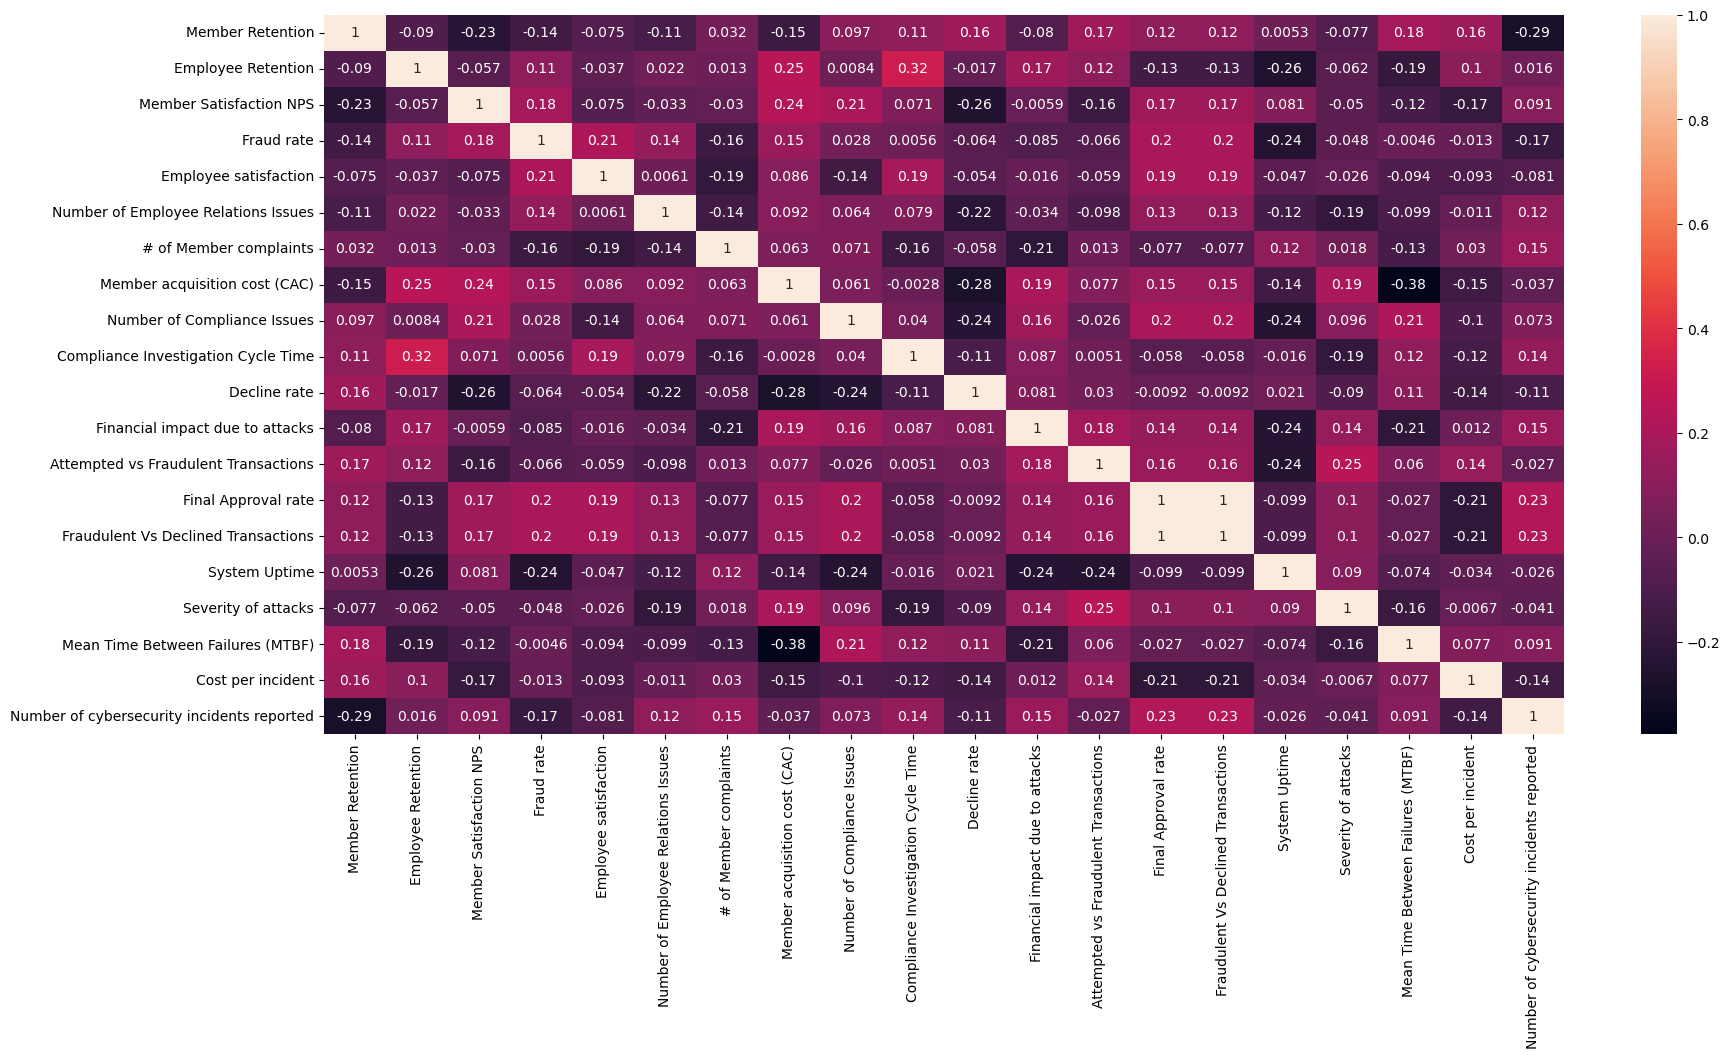

In [14]:

fig, ax = plt.subplots(
        figsize=(20,figure_height), 
        gridspec_kw=dict(top=1-top_margin, bottom=bottom_margin))


ax = sns.heatmap(df_time.corr(method='spearman'), ax=ax,  annot=True)

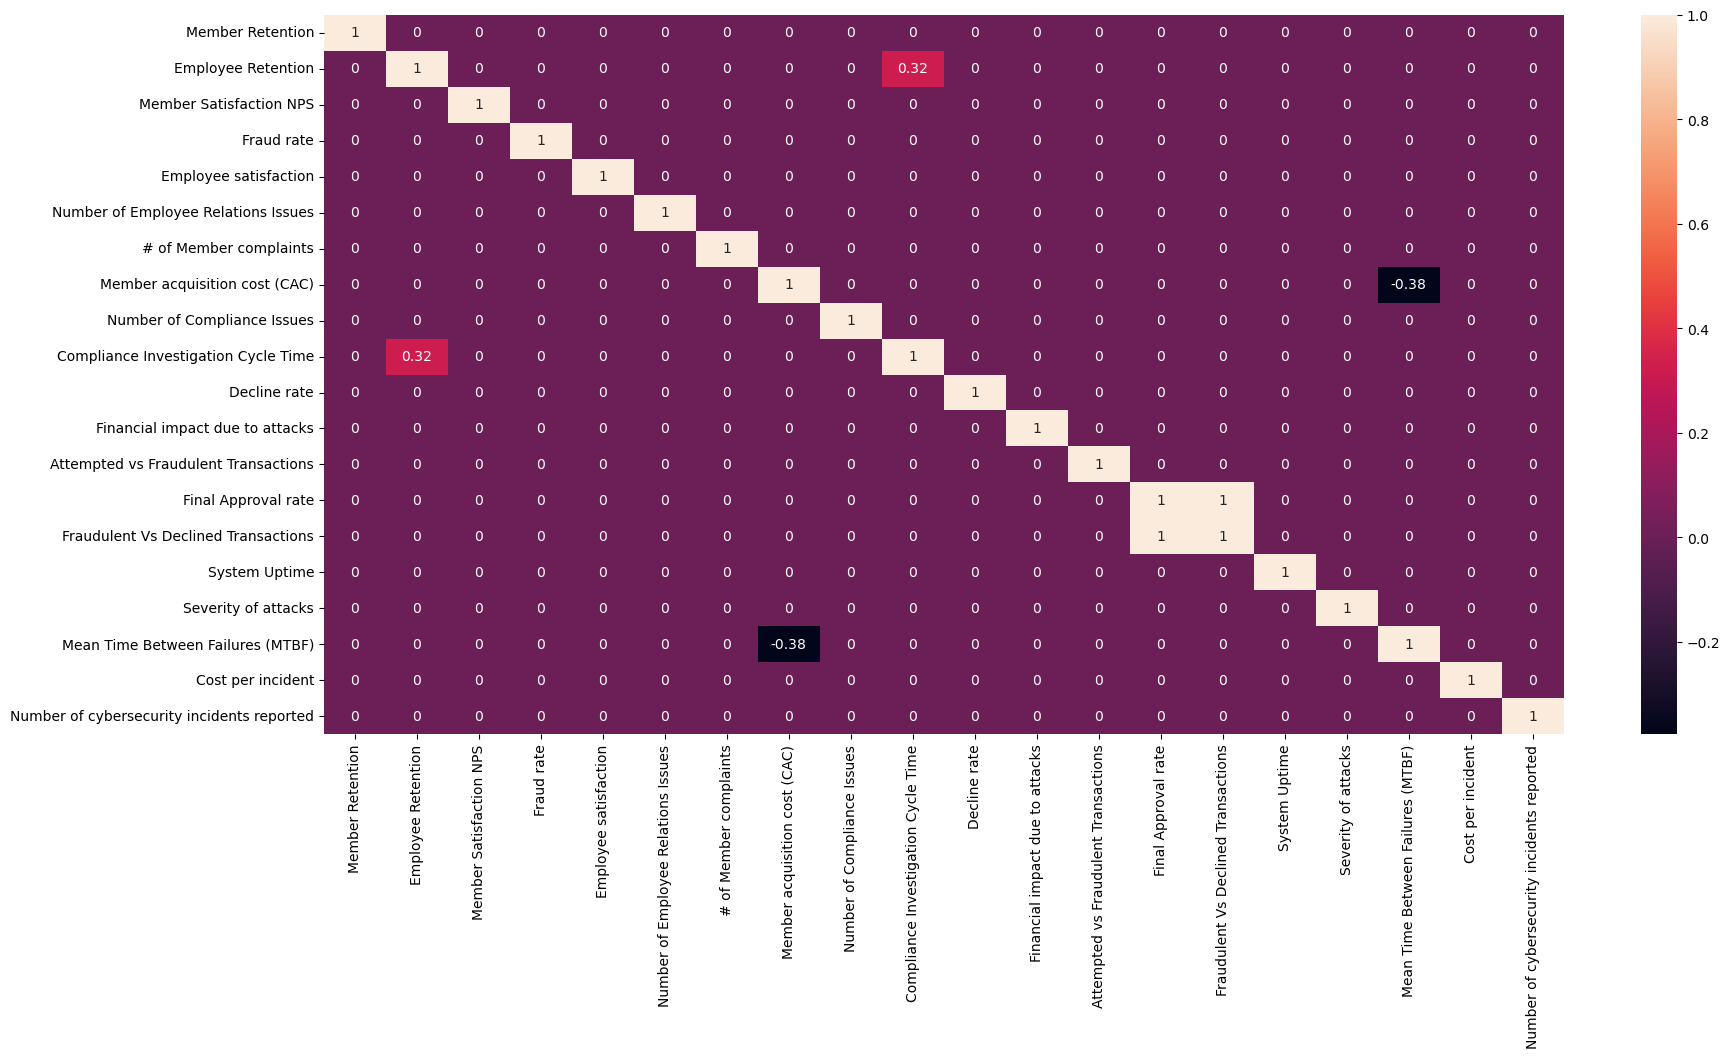

In [15]:
fig, ax = plt.subplots(
        figsize=(20,figure_height), 
        gridspec_kw=dict(top=1-top_margin, bottom=bottom_margin))

ax = sns.heatmap(df_time.corr(method='spearman').applymap(lambda x: 0 if lower_threshold <= x <= upper_threshold else x), ax=ax,  annot=True)

#### kendall Correlation

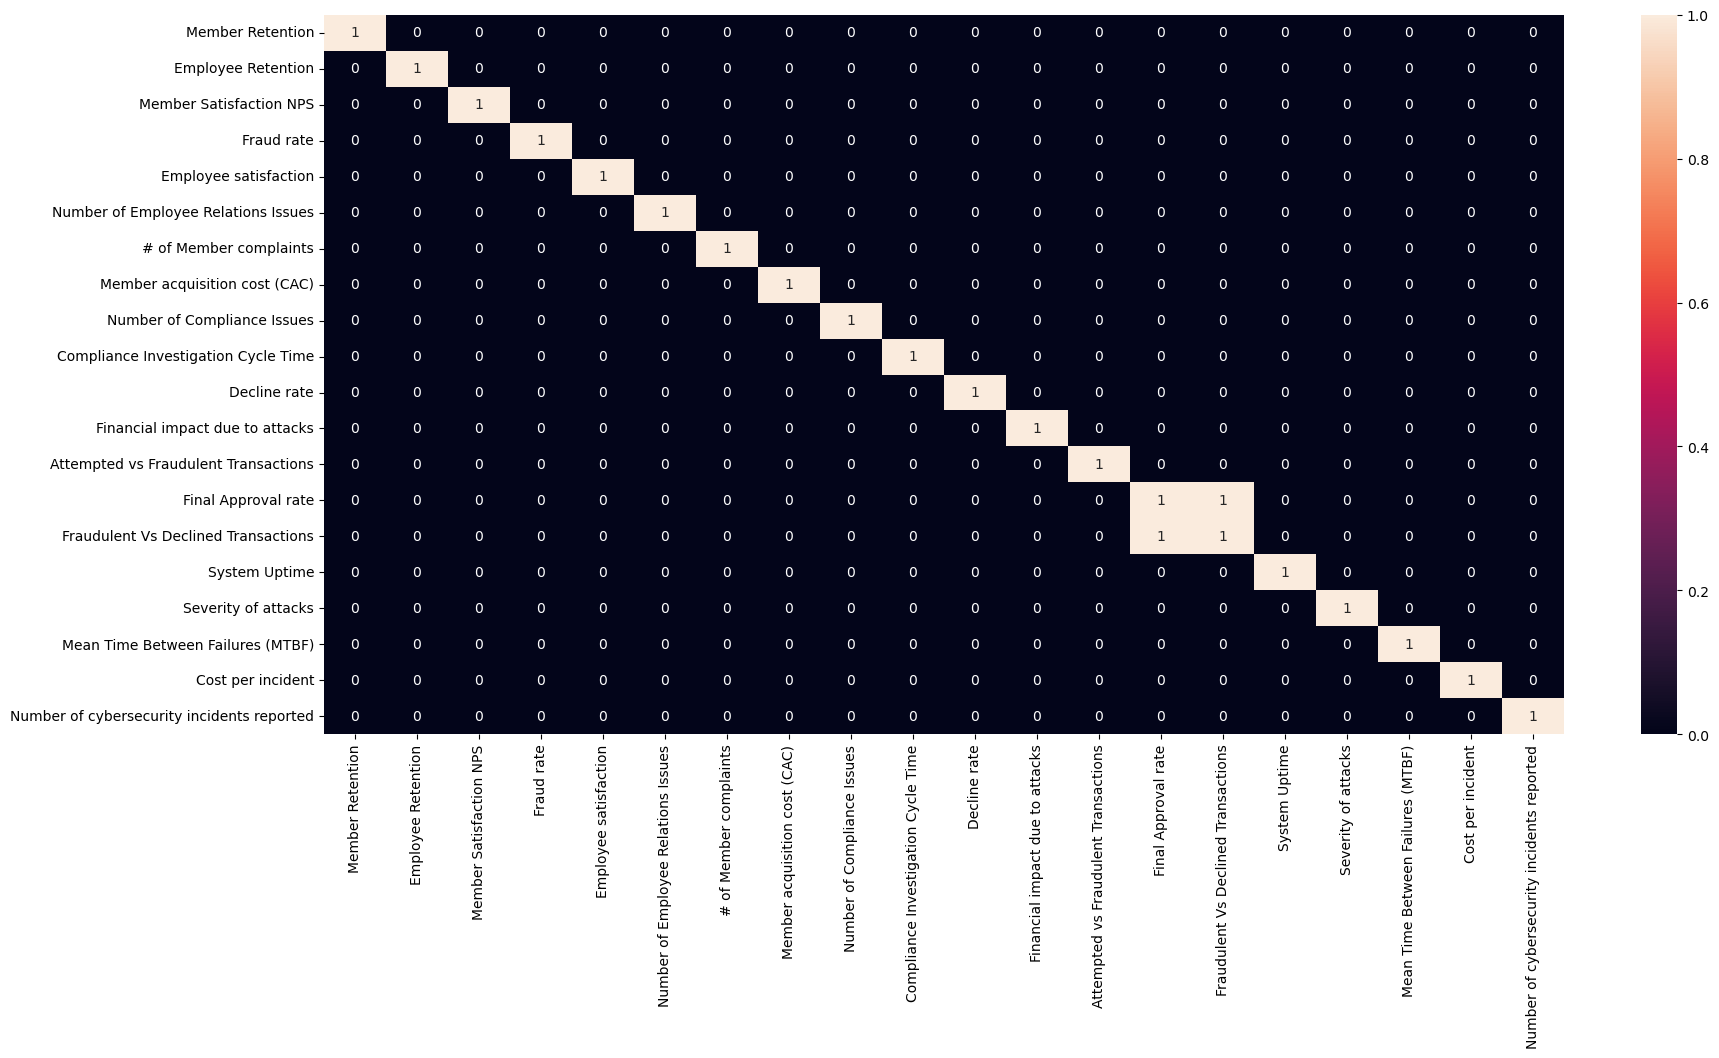

In [16]:
fig, ax = plt.subplots(
        figsize=(20,figure_height), 
        gridspec_kw=dict(top=1-top_margin, bottom=bottom_margin))


ax = sns.heatmap(df_time.corr(method='kendall').applymap(lambda x: 0 if lower_threshold <= x <= upper_threshold else x), ax=ax,  annot=True)

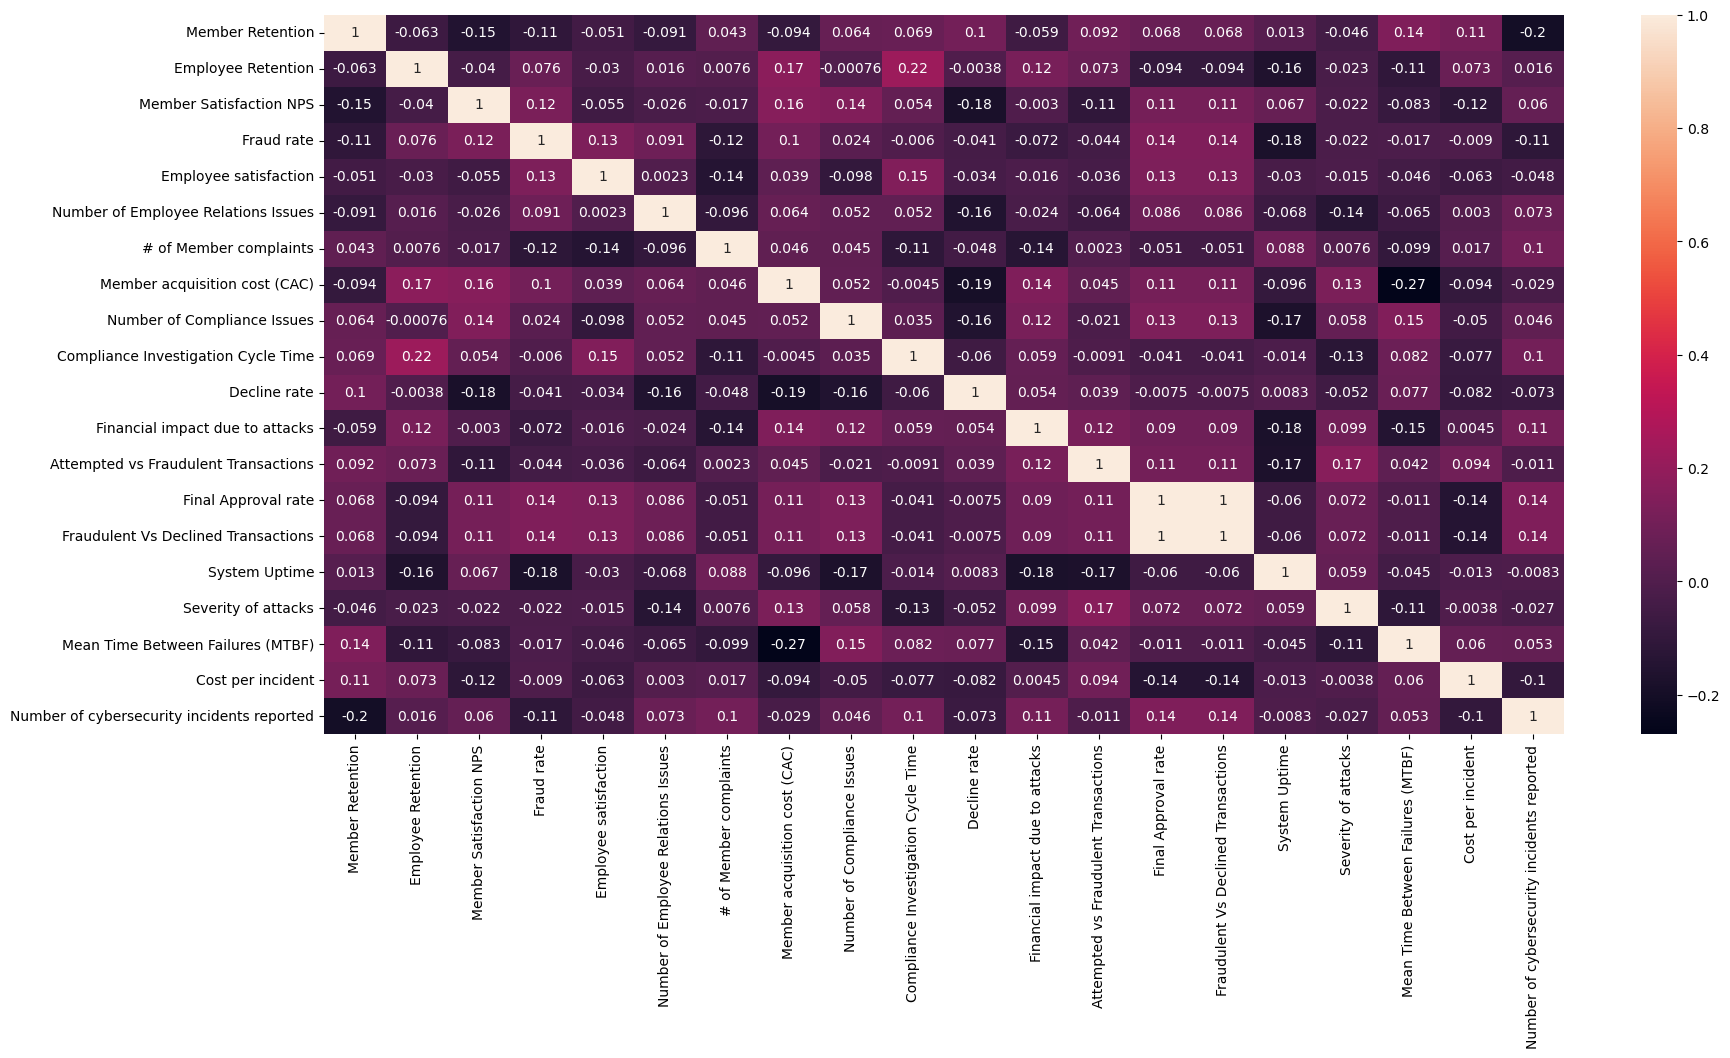

In [17]:

fig, ax = plt.subplots(
        figsize=(20,figure_height), 
        gridspec_kw=dict(top=1-top_margin, bottom=bottom_margin))


ax = sns.heatmap(df_time.corr(method='kendall'), ax=ax,  annot=True)

####  Using percentage change

In [18]:
df_time['Employee Retention'].pct_change().corr(df_time['Member Retention'].pct_change())

-0.2632312413479613

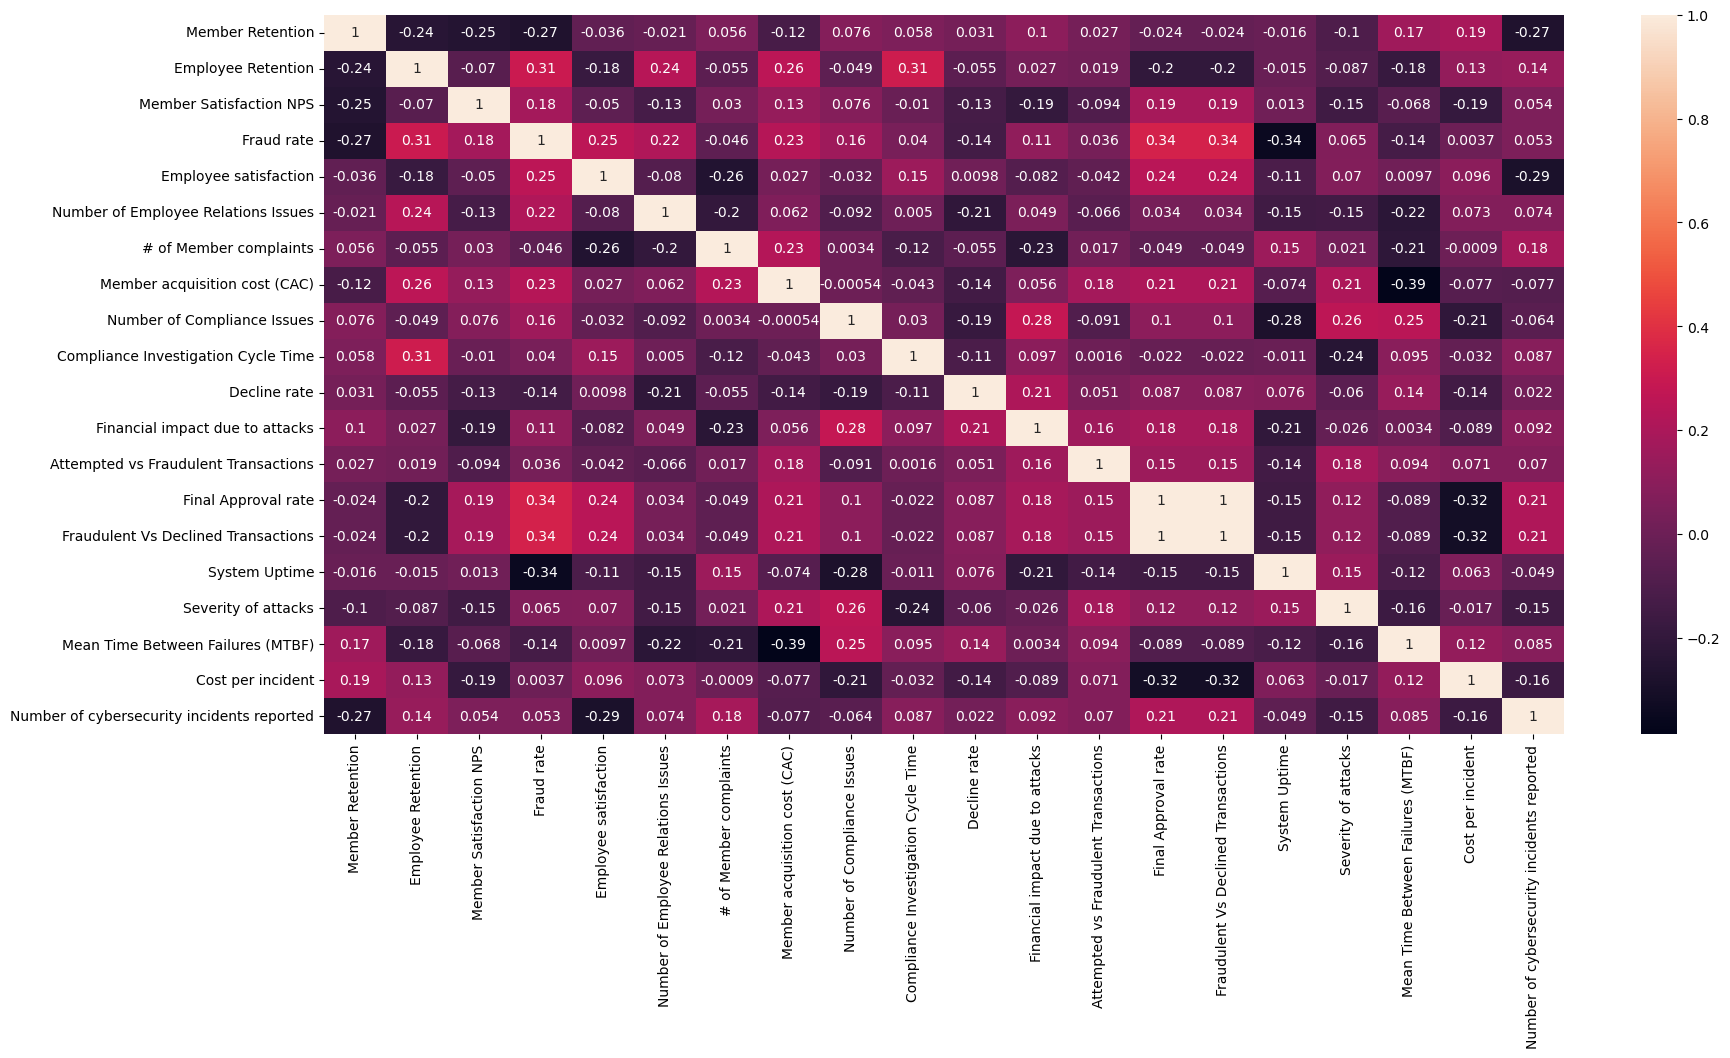

In [19]:
fig, ax = plt.subplots(
        figsize=(20,figure_height), 
        gridspec_kw=dict(top=1-top_margin, bottom=bottom_margin))
ax = sns.heatmap(df_time.pct_change().corr(method='spearman'), ax=ax,  annot=True)

#### Displaying only significant correlation > +-0.3

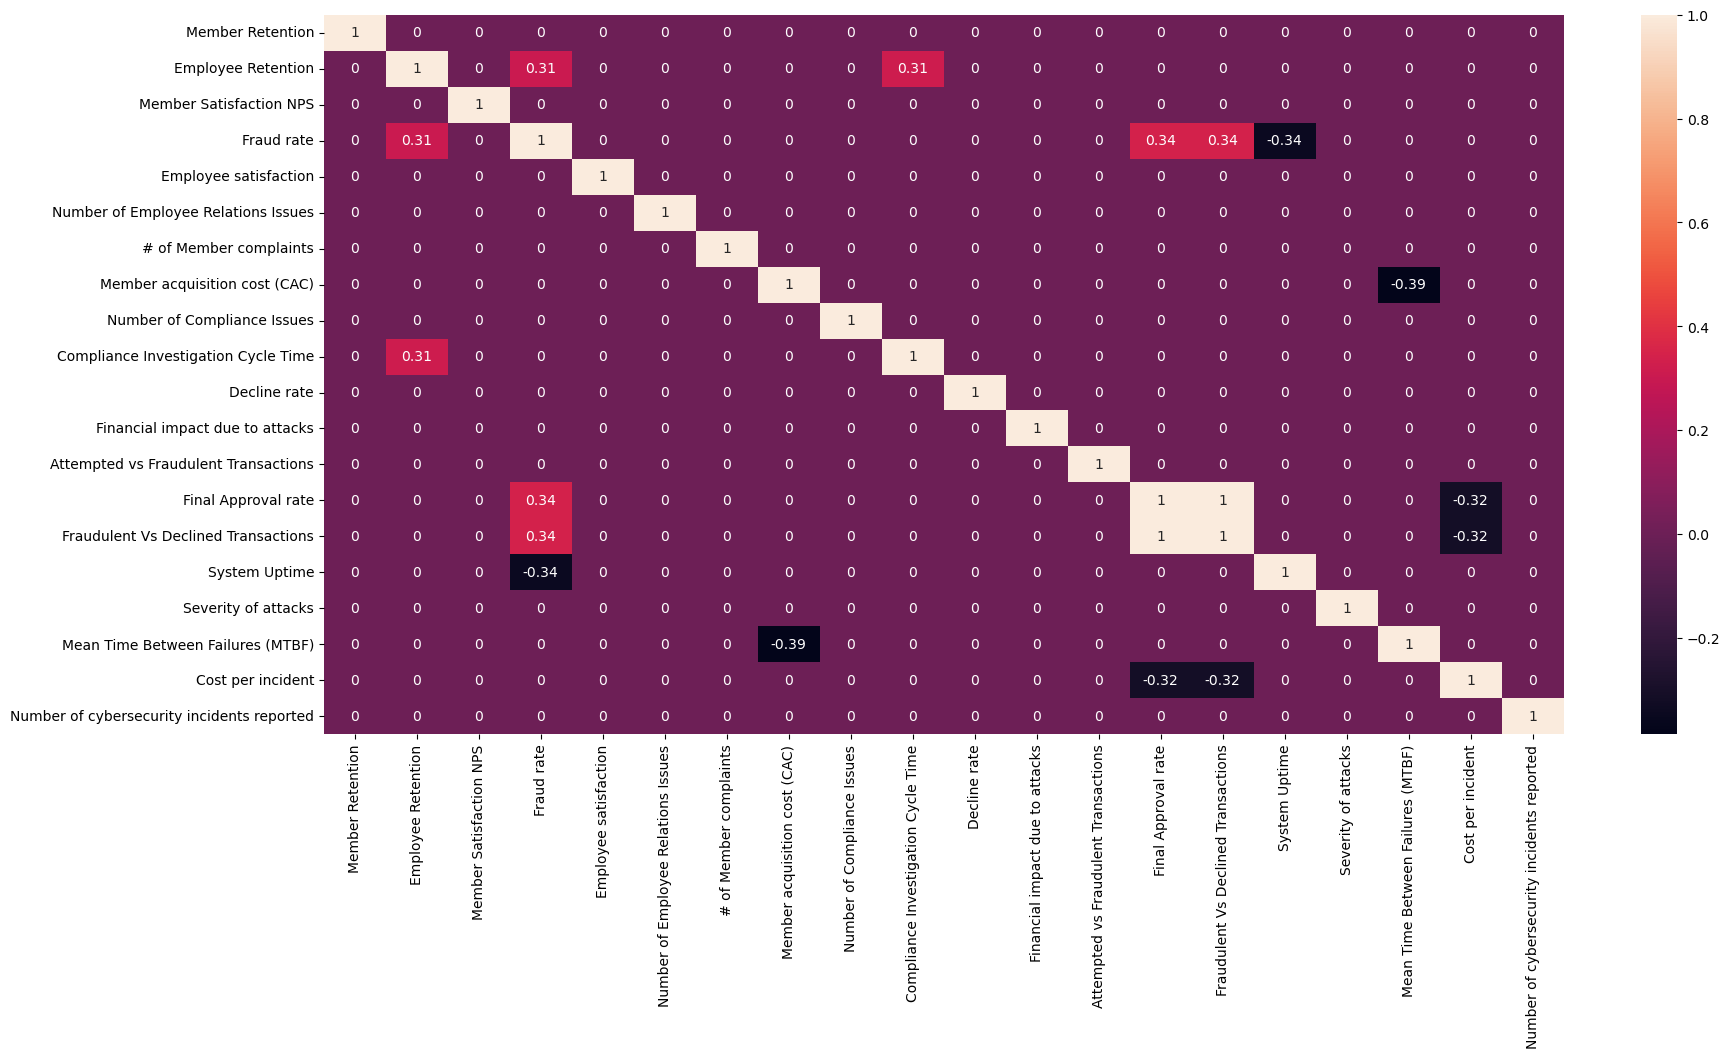

In [20]:
# build the figure instance with the desired height
fig, ax = plt.subplots(
        figsize=(20,figure_height), 
        gridspec_kw=dict(top=1-top_margin, bottom=bottom_margin))

# let seaborn do it's thing
ax = sns.heatmap(df_time.pct_change().corr(method='spearman').applymap(lambda x: 0 if -0.3 <= x <= 0.3 else x), ax=ax,  annot=True)

#### Differencing (lag)

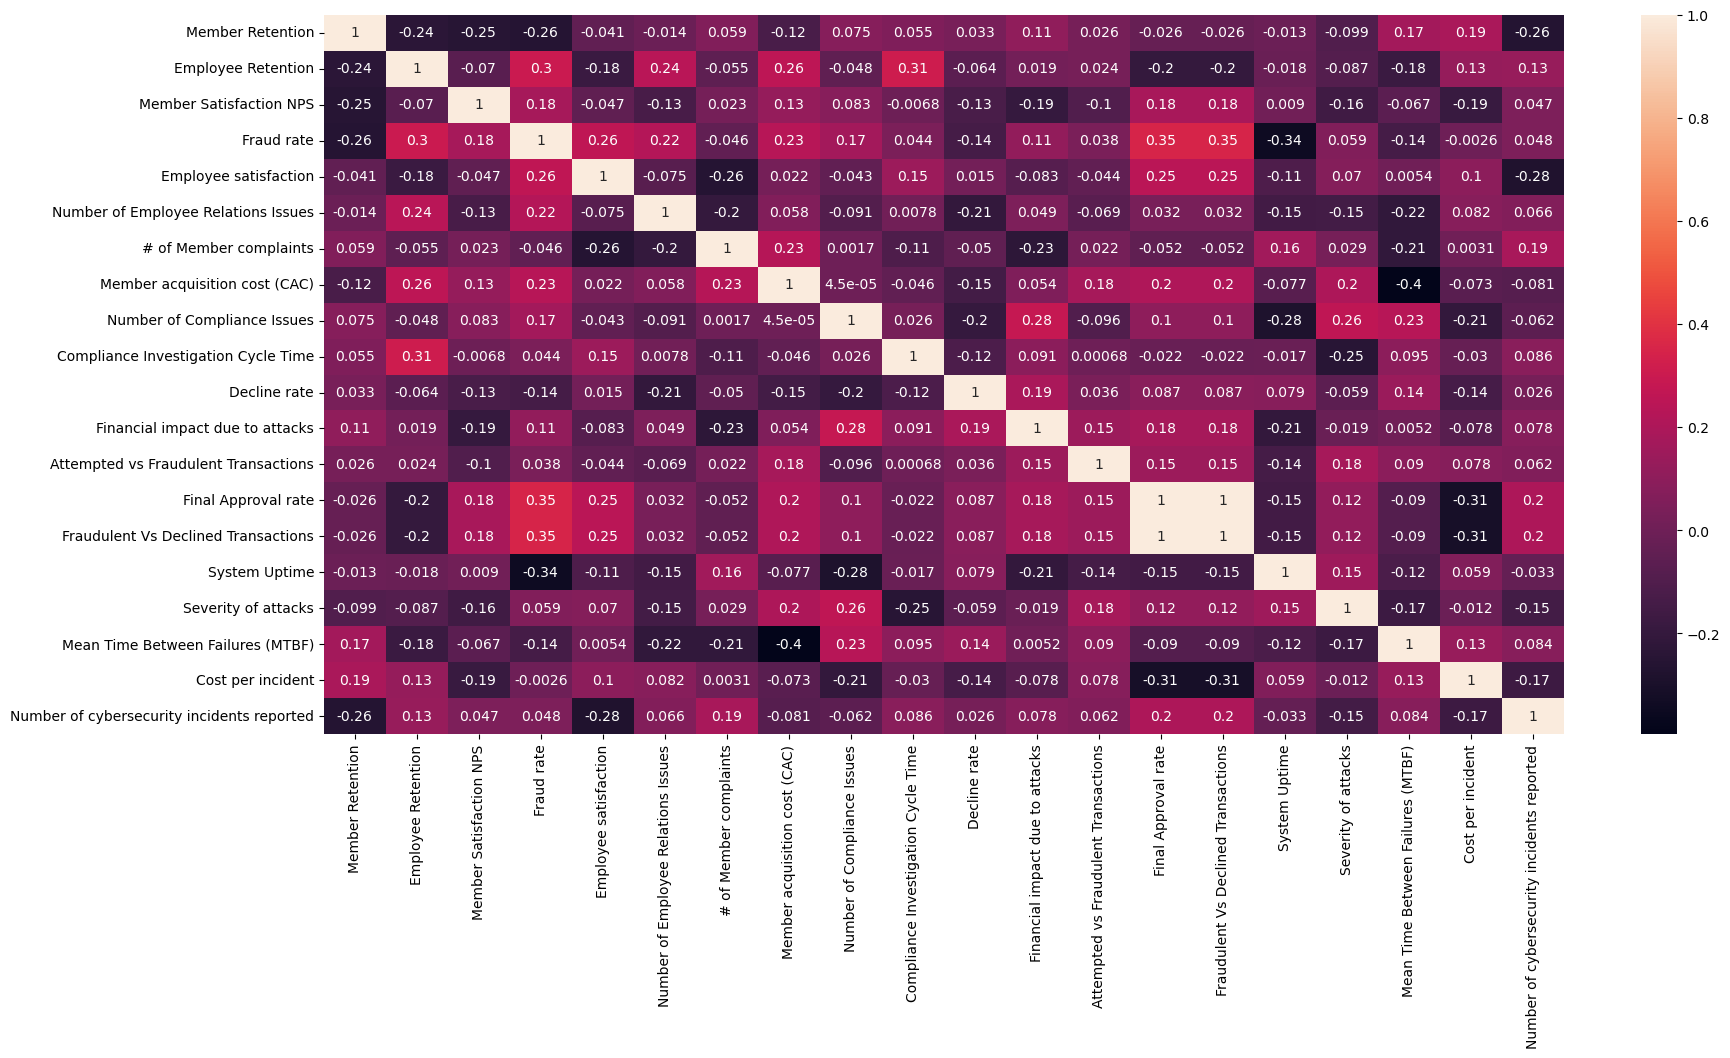

In [21]:
fig, ax = plt.subplots(
        figsize=(20,figure_height), 
        gridspec_kw=dict(top=1-top_margin, bottom=bottom_margin))

ax = sns.heatmap(df_time.diff().corr(method='spearman'), ax=ax,  annot=True)

#### Displaying only significant correlation

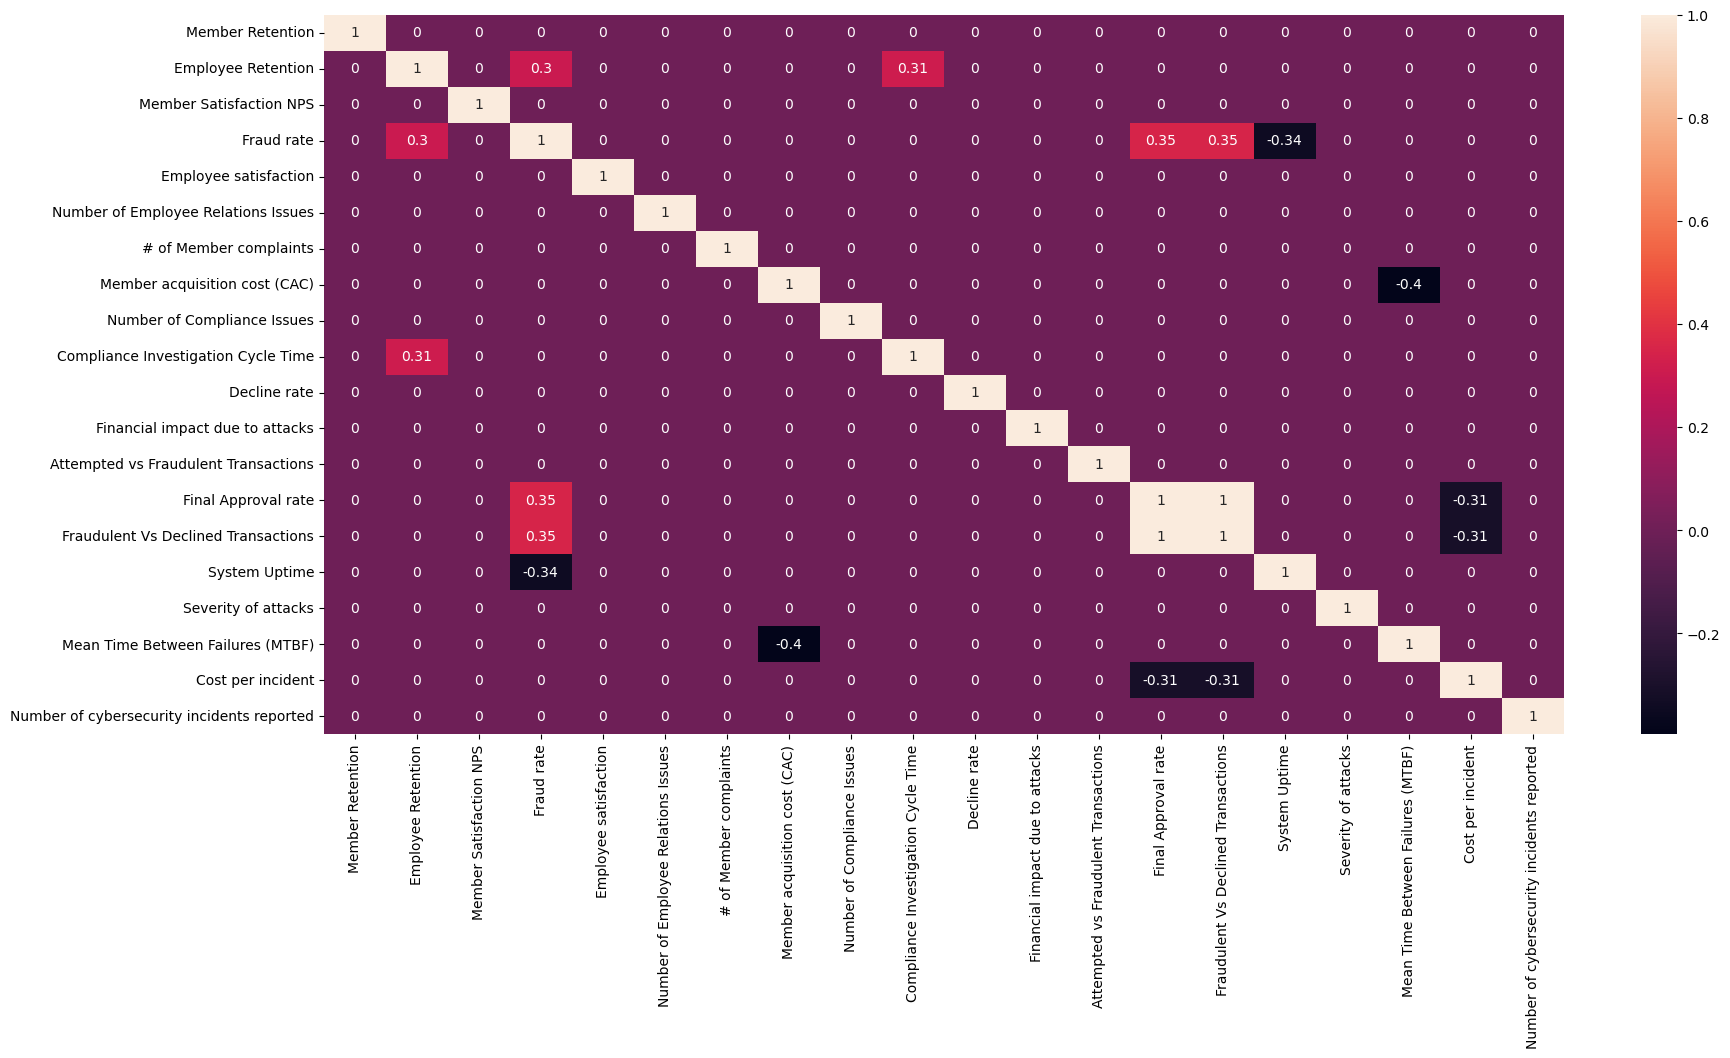

In [22]:
fig, ax = plt.subplots(
        figsize=(20,figure_height), 
        gridspec_kw=dict(top=1-top_margin, bottom=bottom_margin))

ax = sns.heatmap(df_time.diff().corr(method='spearman').applymap(lambda x: 0 if -0.3 <= x <= 0.3 else x), ax=ax,  annot=True)

#### kendall method differencing

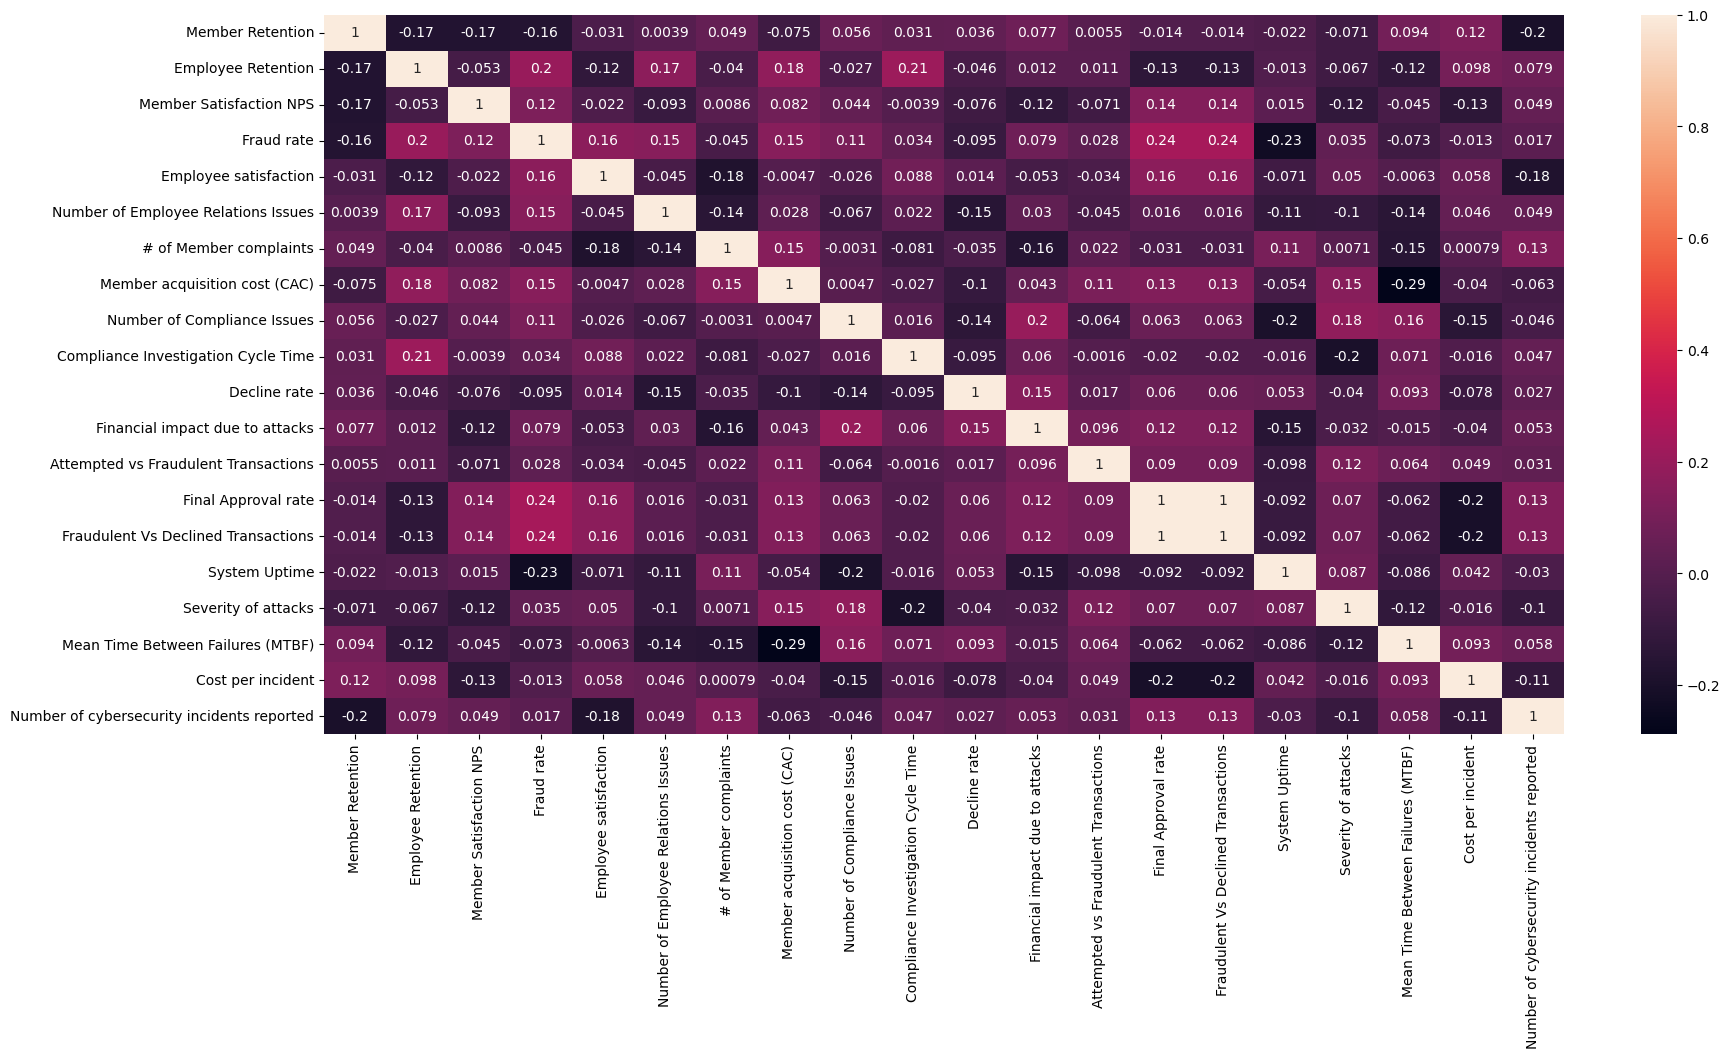

In [23]:
fig, ax = plt.subplots(
        figsize=(20,figure_height), 
        gridspec_kw=dict(top=1-top_margin, bottom=bottom_margin))

ax = sns.heatmap(df_time.diff().corr(method='kendall'), ax=ax,  annot=True)

#### Pearson Method Differencing

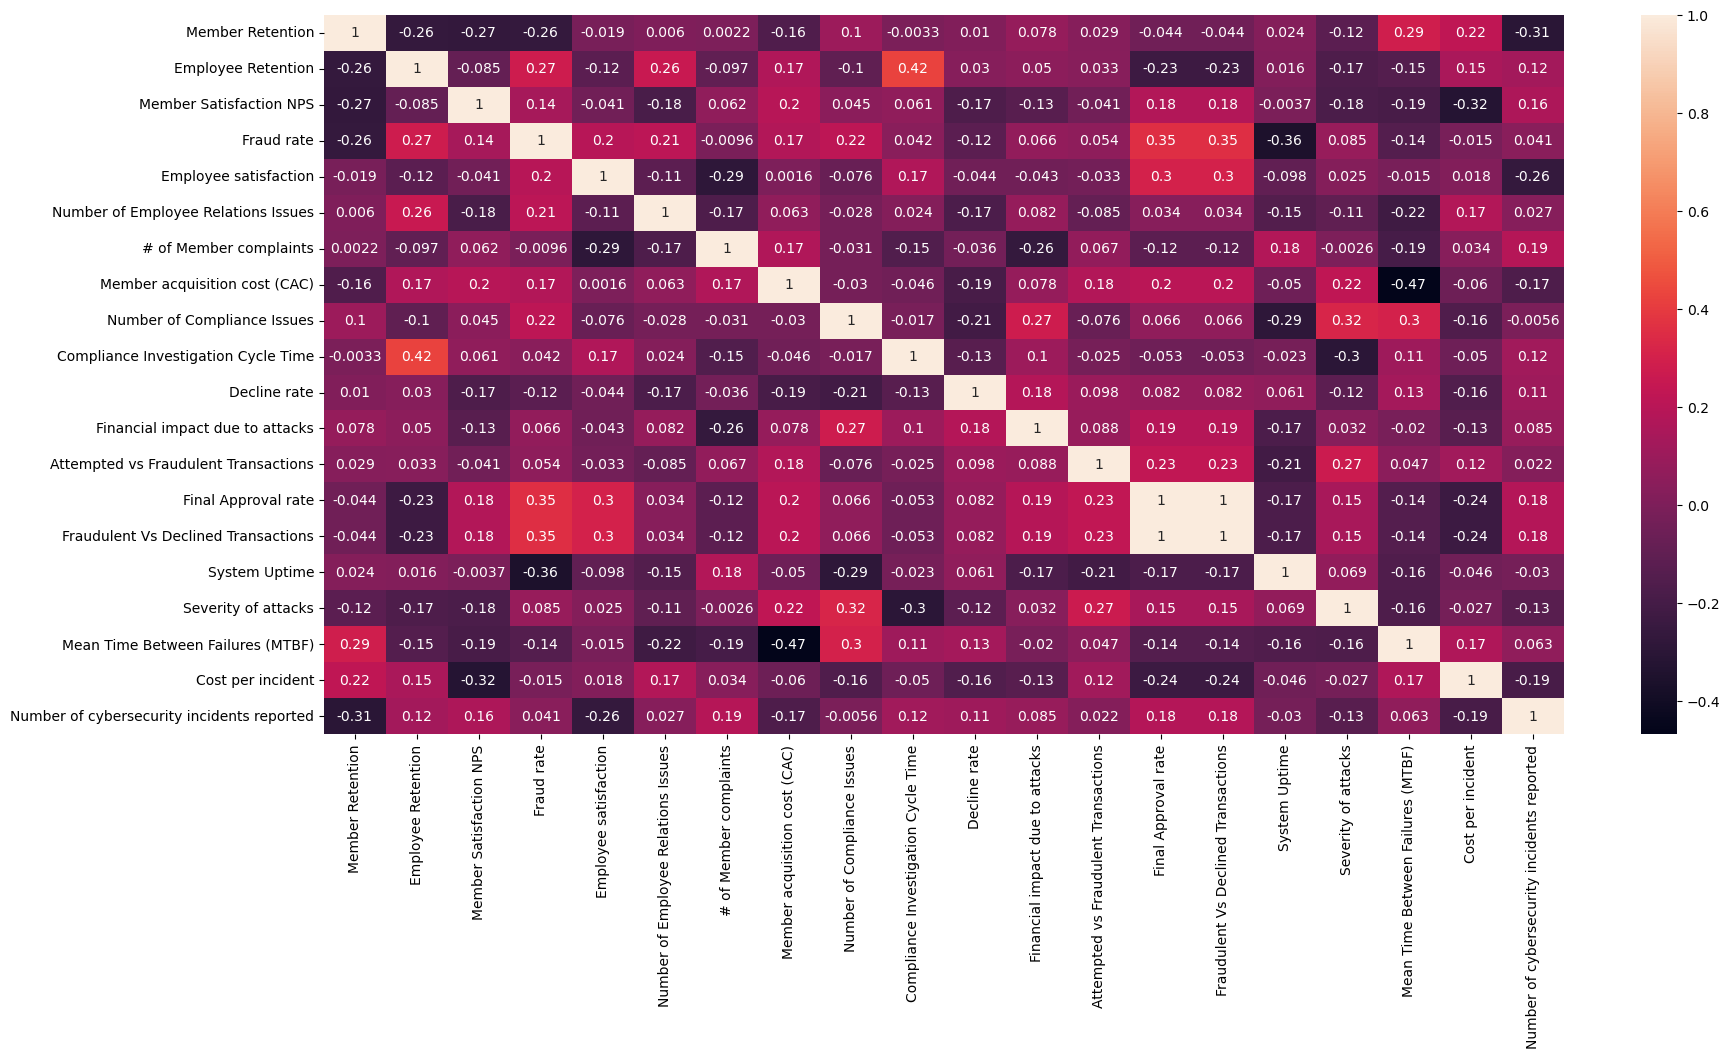

In [24]:

fig, ax = plt.subplots(
        figsize=(20,figure_height), 
        gridspec_kw=dict(top=1-top_margin, bottom=bottom_margin))


ax = sns.heatmap(df_time.diff().corr(method='pearson'), ax=ax,  annot=True)

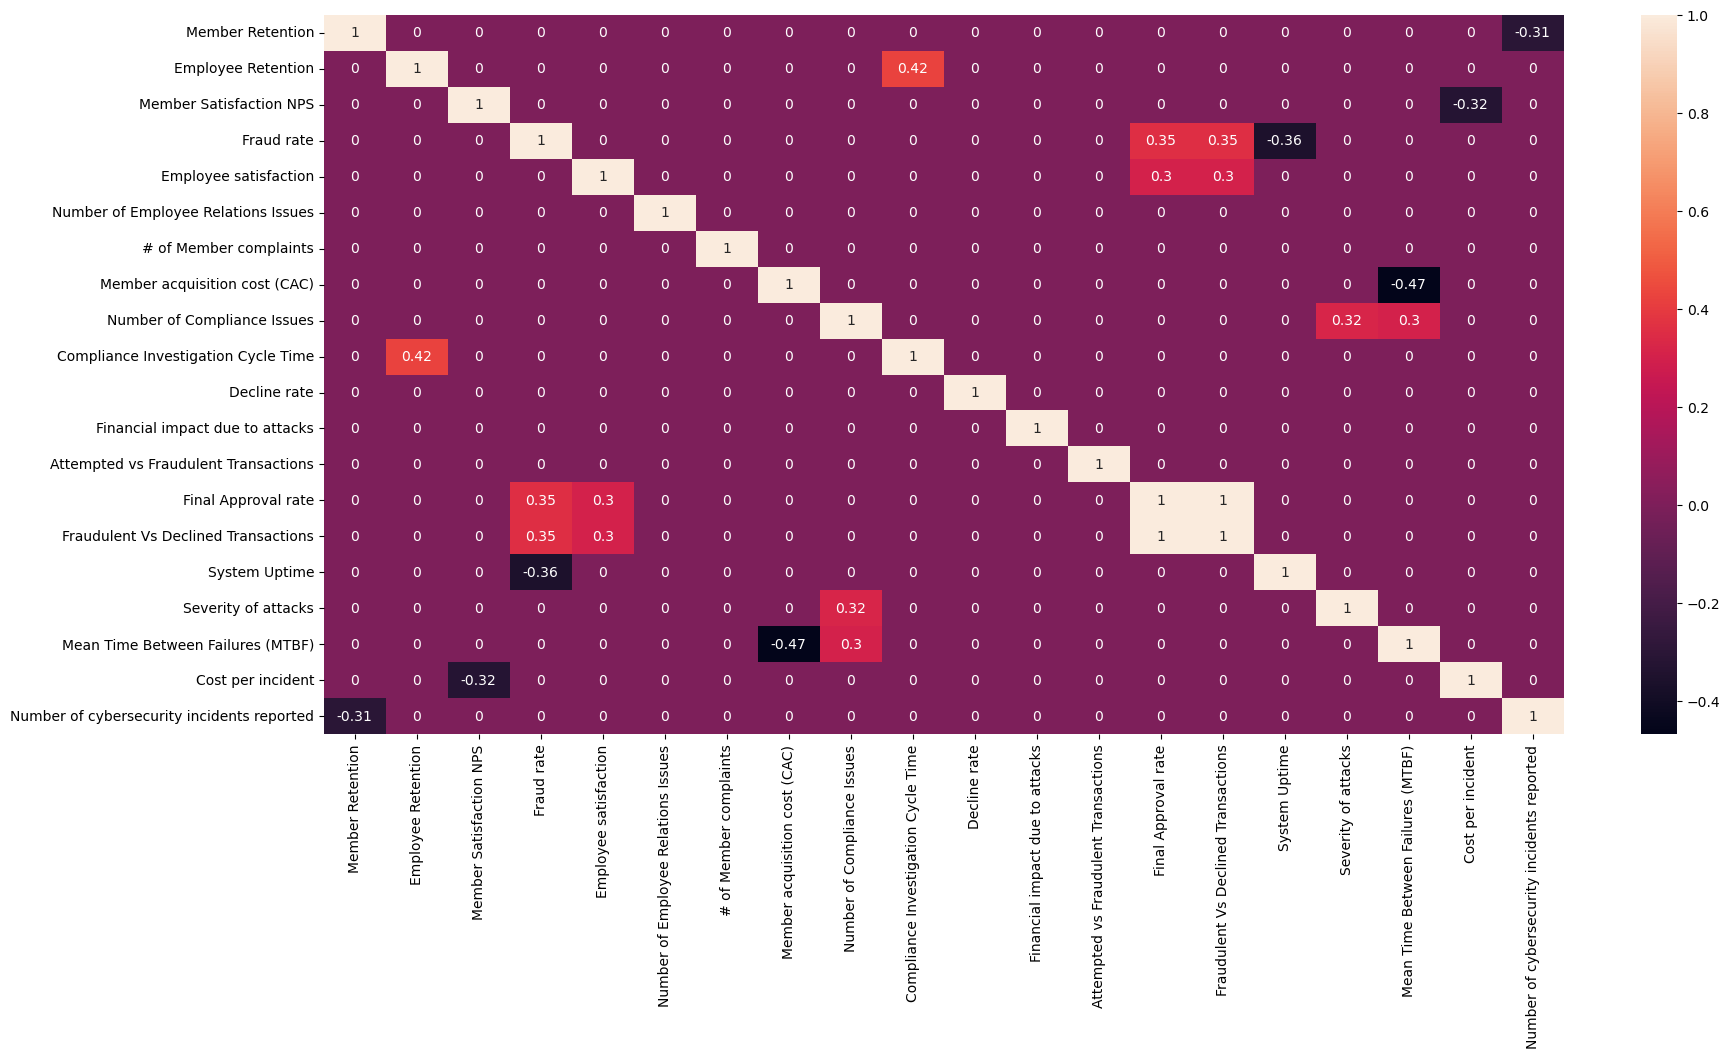

In [25]:
fig, ax = plt.subplots(
        figsize=(20,figure_height), 
        gridspec_kw=dict(top=1-top_margin, bottom=bottom_margin))
ax = sns.heatmap(df_time.diff().corr(method='pearson').applymap(lambda x: 0 if -0.3 <= x <= 0.3 else x), ax=ax,  annot=True)

### Correlation within the groups - Expt 1

In [26]:
overall_data = pd.read_excel('tfcu_member.xlsx', index_col=0, sheet_name='KPI Data')
df_branch_ = overall_data.drop(overall_data.index[0:3])
df_branch_ = df_branch_.drop(columns=['Unnamed: 10'])
df_branch = df_branch_[['Week','Branch','Member Retention',
       'Employee Retention', 'Member Satisfaction NPS', 'Fraud rate',
       'Employee satisfaction', 'Number of Employee Relations Issues',
       '# of Member complaints', 'Member acquisition cost (CAC)',
       'Number of Compliance Issues', 'Compliance Investigation Cycle Time',
       'Decline rate', 'Financial impact due to attacks',
       'Attempted vs Fraudulent Transactions', 'Final Approval rate',
       'Fraudulent Vs Declined Transactions', 'System Uptime',
       'Severity of attacks', 'Mean Time Between Failures (MTBF)',
       'Cost per incident', 'Number of cybersecurity incidents reported'
             ]].groupby([ 'Branch', 'Week']).sum()

In [27]:
df_branch_amity = df_branch.loc['Amityville']

In [28]:
df_branch_amity['Financial impact due to attacks'].head()

Week
WK 01    209224
WK 02    155375
WK 03    157268
WK 04    161081
WK 05    170117
Name: Financial impact due to attacks, dtype: int64

In [29]:
df_time['Financial impact due to attacks'].head()

Week
WK 01    14709.1000
WK 02    15483.0525
WK 03    14896.3150
WK 04    14942.6750
WK 05    14797.1975
Name: Financial impact due to attacks, dtype: float64

In [30]:
df_branch_amity['Financial impact due to attacks'].corr(df_time['Financial impact due to attacks'], 
                                                       method='spearman')

-0.016562793477332877

In [31]:
df_branch_amity['Financial impact due to attacks'].corr(df_time['Financial impact due to attacks'], 
                                                           method='spearman')

-0.016562793477332877

In [32]:
df_branch_['Branch'].unique()

array(['Bay Shore', 'Patchogue', 'Amityville', 'Riverhead', 'Commack',
       'Holbrook', 'Rocky Point', 'East Northport', 'So. Setauket',
       'Selden', 'North Babylon', 'Shirley', 'Wading River', 'Kings Park',
       'Farmingville', 'East Meadow', 'Riverside', 'Merrick', 'Briarwood',
       'Nesconset', 'North Massapequa', 'Manorville',
       'Brookhaven National Lab', 'Huntington', 'Center Moriches',
       'Port Jefferson Station', 'Woodside', 'Stony Brook', 'Smithtown',
       'Hauppauge', 'Central Islip', 'Oakdale'], dtype=object)

In [33]:
df_branch_amity['Financial impact due to attacks'].corr(df_time['Financial impact due to attacks'], 
                                                           method='spearman')

-0.016562793477332877

In [34]:
fin_time_impact =  df_time['Financial impact due to attacks']
all_correlation = []
for branch in df_branch_['Branch'].unique():
    fin_impact_branch = df_branch.loc[branch]['Financial impact due to attacks']
    corr = fin_time_impact.corr(fin_impact_branch, method='spearman')
    all_correlation.append(corr)

all_correlation

[0.09886450951933749,
 0.19755826859045506,
 -0.016562793477332877,
 0.20481516263980193,
 -0.02027704852012549,
 0.2515154102279518,
 0.3195594638435926,
 0.1972167676940152,
 0.22300008537522412,
 0.001195253137539486,
 0.15905404251686162,
 0.1211474430120379,
 0.2822504909075387,
 0.21873132416972593,
 0.046102621019380174,
 0.2833603688209681,
 0.33458550328694614,
 -0.03304021173055579,
 0.23401348928540935,
 0.2339281140612994,
 0.4053615640741057,
 0.09707162981302826,
 0.14317425083240842,
 0.2346111158541791,
 0.1553829078801332,
 0.33595150687270553,
 0.18355673183642104,
 -0.021002305131050968,
 0.18483736019807054,
 0.27354221804832235,
 0.17186032613335608,
 0.06104328523862375]

In [37]:
rebecca_master = ['Amityville',
'Center Moriches',
'East Northport',
'Huntington',
'Nesconset',
'Patchogue',
'Rocky Point',
'So. Setauket']



### Correlation overall Table with manager relationship

In [38]:
overall_data = pd.read_excel('tfcu_member.xlsx', index_col=0, sheet_name='KPI Data')
manager_data = pd.read_excel('tfcu_member.xlsx', index_col=0, sheet_name='Employee Master')
overall_data = overall_data.drop(overall_data.index[0:3])
overall_data = overall_data.drop(columns=['Unnamed: 10'])
# df_branch = df_branch_[['Week','Branch','Member Retention',
#        'Employee Retention', 'Member Satisfaction NPS', 'Fraud rate',
#        'Employee satisfaction', 'Number of Employee Relations Issues',
#        '# of Member complaints', 'Member acquisition cost (CAC)',
#        'Number of Compliance Issues', 'Compliance Investigation Cycle Time',
#        'Decline rate', 'Financial impact due to attacks',
#        'Attempted vs Fraudulent Transactions', 'Final Approval rate',
#        'Fraudulent Vs Declined Transactions', 'System Uptime',
#        'Severity of attacks', 'Mean Time Between Failures (MTBF)',
#        'Cost per incident', 'Number of cybersecurity incidents reported'
#              ]].groupby([ 'Branch', 'Week']).sum()

In [39]:
manager_data.head()

Emp First Name Emp Last Name    Emp Mobile  \
Emp Id                                                 
TCFU-0001          Apple       William  631-385 8791   
TCFU-0002            Bri         James  631-385 1161   
TCFU-0003         Alaska        Robert  631-385 1994   
TCFU-0004          Ariel        Joseph  631-385 8476   
TCFU-0005      Bridgette        George  631-385 8743   

                        Emp Email Id Emp Designation      Branch  \
Emp Id                                                             
TCFU-0001     apple.william@tcfu.com             FSR   Bay Shore   
TCFU-0002         bri.james@tcfu.com             FSR   Patchogue   
TCFU-0003     alaska.robert@tcfu.com             FSR  Amityville   
TCFU-0004      ariel.joseph@tcfu.com             FSR  Amityville   
TCFU-0005  bridgette.george@tcfu.com             FSR   Riverhead   

          Reporting Manager First Name Reporting Manager Last  Name  
Emp Id                                                               
TCFU-0001                       Oliver                         Ivan  
TCFU-0002                        Banks                       Thelma  
TCFU-0003                         Liam                      Wilfred  
TCFU-0004                         Liam                      Wilfred  
TCFU-0005                       Wylder                        Edith

In [40]:
overall_data.head()

Emp First Name Emp Last Name    Emp Mobile  \
Emp Id                                                 
TCFU-0001          Apple       William  631-385 8791   
TCFU-0002            Bri         James  631-385 1161   
TCFU-0003         Alaska        Robert  631-385 1994   
TCFU-0004          Ariel        Joseph  631-385 8476   
TCFU-0005      Bridgette        George  631-385 8743   

                        Emp Email Id Emp Designation      Branch  \
Emp Id                                                             
TCFU-0001     apple.william@tcfu.com             FSR   Bay Shore   
TCFU-0002         bri.james@tcfu.com             FSR   Patchogue   
TCFU-0003     alaska.robert@tcfu.com             FSR  Amityville   
TCFU-0004      ariel.joseph@tcfu.com             FSR  Amityville   
TCFU-0005  bridgette.george@tcfu.com             FSR   Riverhead   

          Branch Manager First Name Branch Manager Last  Name   Week  \
Emp Id                                                                 
TCFU-0001                    Oliver                      Ivan  WK 01   
TCFU-0002                     Banks                    Thelma  WK 01   
TCFU-0003                      Liam                   Wilfred  WK 01   
TCFU-0004                      Liam                   Wilfred  WK 01   
TCFU-0005                    Wylder                     Edith  WK 01   

          Member Retention  ... Decline rate Financial impact due to attacks  \
Emp Id                      ...                                                
TCFU-0001               95  ...            4                           17659   
TCFU-0002               94  ...            2                            7176   
TCFU-0003               86  ...           10                           19038   
TCFU-0004               70  ...            1                           16007   
TCFU-0005               90  ...            1                            9574   

          Attempted vs Fraudulent Transactions Final Approval rate  \
Emp Id                                                               
TCFU-0001                                    9                  82   
TCFU-0002                                    9                  79   
TCFU-0003                                    6                  73   
TCFU-0004                                   10                  85   
TCFU-0005                                   10                  77   

          Fraudulent Vs Declined Transactions System Uptime  \
Emp Id                                                        
TCFU-0001                                  82            91   
TCFU-0002                                  79            98   
TCFU-0003                                  73            96   
TCFU-0004                                  85            95   
TCFU-0005                                  77            94   

          Severity of attacks Mean Time Between Failures (MTBF)  \
Emp Id                                                            
TCFU-0001                   6                                93   
TCFU-0002                  10                                37   
TCFU-0003                   2                                12   
TCFU-0004                   9                                95   
TCFU-0005                   4                                13   

          Cost per incident Number of cybersecurity incidents reported  
Emp Id                                                                  
TCFU-0001              6160                                          3  
TCFU-0002              8560                                          6  
TCFU-0003              7274                                          2  
TCFU-0004              7221                                          6  
TCFU-0005              5420                                          5  

[5 rows x 29 columns]

In [41]:
len(overall_data)

20800

In [42]:
merged_data = pd.merge(overall_data, manager_data, on='Emp Id', how='inner')
merged_data.head()

Emp First Name_x Emp Last Name_x  Emp Mobile_x  \
Emp Id                                                     
TCFU-0001            Apple         William  631-385 8791   
TCFU-0001            Apple         William  631-385 8791   
TCFU-0001            Apple         William  631-385 8791   
TCFU-0001            Apple         William  631-385 8791   
TCFU-0001            Apple         William  631-385 8791   

                   Emp Email Id_x Emp Designation_x   Branch_x  \
Emp Id                                                           
TCFU-0001  apple.william@tcfu.com               FSR  Bay Shore   
TCFU-0001  apple.william@tcfu.com               FSR  Bay Shore   
TCFU-0001  apple.william@tcfu.com               FSR  Bay Shore   
TCFU-0001  apple.william@tcfu.com               FSR  Bay Shore   
TCFU-0001  apple.william@tcfu.com               FSR  Bay Shore   

          Branch Manager First Name Branch Manager Last  Name   Week  \
Emp Id                                                                 
TCFU-0001                    Oliver                      Ivan  WK 01   
TCFU-0001                    Oliver                      Ivan  WK 02   
TCFU-0001                    Oliver                      Ivan  WK 03   
TCFU-0001                    Oliver                      Ivan  WK 04   
TCFU-0001                    Oliver                      Ivan  WK 05   

          Member Retention  ... Cost per incident  \
Emp Id                      ...                     
TCFU-0001               95  ...              6160   
TCFU-0001               72  ...              8479   
TCFU-0001               74  ...              8612   
TCFU-0001               93  ...              6388   
TCFU-0001               63  ...              5315   

          Number of cybersecurity incidents reported Emp First Name_y  \
Emp Id                                                                  
TCFU-0001                                          3            Apple   
TCFU-0001                                          2            Apple   
TCFU-0001                                          4            Apple   
TCFU-0001                                          0            Apple   
TCFU-0001                                          4            Apple   

          Emp Last Name_y  Emp Mobile_y          Emp Email Id_y  \
Emp Id                                                            
TCFU-0001         William  631-385 8791  apple.william@tcfu.com   
TCFU-0001         William  631-385 8791  apple.william@tcfu.com   
TCFU-0001         William  631-385 8791  apple.william@tcfu.com   
TCFU-0001         William  631-385 8791  apple.william@tcfu.com   
TCFU-0001         William  631-385 8791  apple.william@tcfu.com   

          Emp Designation_y   Branch_y Reporting Manager First Name  \
Emp Id                                                                
TCFU-0001               FSR  Bay Shore                       Oliver   
TCFU-0001               FSR  Bay Shore                       Oliver   
TCFU-0001               FSR  Bay Shore                       Oliver   
TCFU-0001               FSR  Bay Shore                       Oliver   
TCFU-0001               FSR  Bay Shore                       Oliver   

          Reporting Manager Last  Name  
Emp Id                                  
TCFU-0001                         Ivan  
TCFU-0001                         Ivan  
TCFU-0001                         Ivan  
TCFU-0001                         Ivan  
TCFU-0001                         Ivan  

[5 rows x 37 columns]

In [43]:
merged_data = pd.merge(overall_data, manager_data, on='Emp Id', how='inner')

In [44]:
len(merged_data)

20800

In [45]:
merged_data['Reporting Manager First Name'].unique()

array(['Oliver', 'Banks', 'Liam', 'Wylder', 'Benjamin', 'Eliam', 'Kylian',
       'Henry', 'Zyair', 'Cillian', 'Camilo', 'Bridger', 'John', 'Ozzy',
       'Theodore', 'Lucas', 'Elio', 'Khai', 'Elijah', 'Evander', 'Mac',
       'Loyal', 'Noah', 'Colter', 'James', 'Gian', 'Jack', 'Koen', 'Onyx',
       'Amiri', 'William', 'Jiraiya'], dtype=object)

In [46]:
merged_df = pd.merge(merged_data, manager_data, left_on=['Reporting Manager First Name', 'Reporting Manager Last  Name'],
                     right_on=['Emp First Name', 'Emp Last Name'],
                     how='inner')
merged_df.head()

Emp First Name_x Emp Last Name_x  Emp Mobile_x          Emp Email Id_x  \
0            Apple         William  631-385 8791  apple.william@tcfu.com   
1            Apple         William  631-385 8791  apple.william@tcfu.com   
2            Apple         William  631-385 8791  apple.william@tcfu.com   
3            Apple         William  631-385 8791  apple.william@tcfu.com   
4            Apple         William  631-385 8791  apple.william@tcfu.com   

  Emp Designation_x   Branch_x Branch Manager First Name  \
0               FSR  Bay Shore                    Oliver   
1               FSR  Bay Shore                    Oliver   
2               FSR  Bay Shore                    Oliver   
3               FSR  Bay Shore                    Oliver   
4               FSR  Bay Shore                    Oliver   

  Branch Manager Last  Name   Week Member Retention  ...  \
0                      Ivan  WK 01               95  ...   
1                      Ivan  WK 02               72  ...   
2                      Ivan  WK 03               74  ...   
3                      Ivan  WK 04               93  ...   
4                      Ivan  WK 05               63  ...   

  Reporting Manager First Name_x Reporting Manager Last  Name_x  \
0                         Oliver                           Ivan   
1                         Oliver                           Ivan   
2                         Oliver                           Ivan   
3                         Oliver                           Ivan   
4                         Oliver                           Ivan   

  Emp First Name Emp Last Name    Emp Mobile          Emp Email Id  \
0         Oliver          Ivan  631-698 4145  oliver.ivan@tcfu.com   
1         Oliver          Ivan  631-698 4145  oliver.ivan@tcfu.com   
2         Oliver          Ivan  631-698 4145  oliver.ivan@tcfu.com   
3         Oliver          Ivan  631-698 4145  oliver.ivan@tcfu.com   
4         Oliver          Ivan  631-698 4145  oliver.ivan@tcfu.com   

  Emp Designation     Branch Reporting Manager First Name_y  \
0  Branch Manager  Bay Shore                           Rosa   
1  Branch Manager  Bay Shore                           Rosa   
2  Branch Manager  Bay Shore                           Rosa   
3  Branch Manager  Bay Shore                           Rosa   
4  Branch Manager  Bay Shore                           Rosa   

  Reporting Manager Last  Name_y  
0                          Elise  
1                          Elise  
2                          Elise  
3                          Elise  
4                          Elise  

[5 rows x 45 columns]

In [47]:
len(merged_df)

20800

In [48]:
grouped_data = merged_df[['Week','Reporting Manager First Name_y', 'Reporting Manager Last  Name_y','Member Retention',
       'Employee Retention', 'Member Satisfaction NPS', 'Fraud rate',
       'Employee satisfaction', 'Number of Employee Relations Issues',
       '# of Member complaints', 'Member acquisition cost (CAC)',
       'Number of Compliance Issues', 'Compliance Investigation Cycle Time',
       'Decline rate', 'Financial impact due to attacks',
       'Attempted vs Fraudulent Transactions', 'Final Approval rate',
       'Fraudulent Vs Declined Transactions', 'System Uptime',
       'Severity of attacks', 'Mean Time Between Failures (MTBF)',
       'Cost per incident', 'Number of cybersecurity incidents reported'
             ]].groupby([ 'Reporting Manager First Name_y', 'Reporting Manager Last  Name_y', 'Week', ]).mean()

In [49]:
grouped_data.index

MultiIndex([('Alex', 'Junior', 'WK 01'),
            ('Alex', 'Junior', 'WK 02'),
            ('Alex', 'Junior', 'WK 03'),
            ('Alex', 'Junior', 'WK 04'),
            ('Alex', 'Junior', 'WK 05'),
            ('Alex', 'Junior', 'WK 06'),
            ('Alex', 'Junior', 'WK 07'),
            ('Alex', 'Junior', 'WK 08'),
            ('Alex', 'Junior', 'WK 09'),
            ('Alex', 'Junior', 'WK 10'),
            ...
            ('Rosa',  'Elise', 'WK 43'),
            ('Rosa',  'Elise', 'WK 44'),
            ('Rosa',  'Elise', 'WK 45'),
            ('Rosa',  'Elise', 'WK 46'),
            ('Rosa',  'Elise', 'WK 47'),
            ('Rosa',  'Elise', 'WK 48'),
            ('Rosa',  'Elise', 'WK 49'),
            ('Rosa',  'Elise', 'WK 50'),
            ('Rosa',  'Elise', 'WK 51'),
            ('Rosa',  'Elise', 'WK 52')],
           names=['Reporting Manager First Name_y', 'Reporting Manager Last  Name_y', 'Week'], length=208)

In [50]:
unique_reporting_man = []
for indexes in grouped_data.index.unique():
    if indexes[:2] not in unique_reporting_man:
        unique_reporting_man.append(indexes[:2])
    # print(indexes[:2])

In [51]:
unique_reporting_man

[('Alex', 'Junior'),
 ('Mathew', 'Joseph'),
 ('Rebecca', 'Million'),
 ('Rosa', 'Elise')]

In [52]:
# fin_time_impact =  df_time['Financial impact due to attacks']
# all_correlation = []
# for branch in grouped_data['Branch'].unique():
#     fin_impact_branch = df_branch.loc[branch]['Financial impact due to attacks']
#     corr = fin_time_impact.corr(fin_impact_branch, method='spearman')
#     all_correlation.append(corr)
# unique_reporting_man

In [53]:
fin_time_impact =  df_time['Financial impact due to attacks']
all_correlation = []
for managers in unique_reporting_man:
    fin_impact_branch = grouped_data.loc[managers]['Financial impact due to attacks']
    corr = fin_time_impact.corr(fin_impact_branch, method='spearman')
    all_correlation.append((corr,*managers))

In [54]:
# merged_data_df = pd.merge(df_emp, df_manager, left_on=['emp_first_name', 'emp_last_name'],
#                      right_on=['manager_first_name', 'manager_last_name'],
#                      how='left')

In [55]:
all_correlation

[(0.3614786988815845, 'Alex', 'Junior'),
 (0.43046187996243485, 'Mathew', 'Joseph'),
 (0.5076410825578418, 'Rebecca', 'Million'),
 (0.6117988559719969, 'Rosa', 'Elise')]

In [56]:
fin_time_impact =  df_time['Financial impact due to attacks']
all_correlation = []
for managers in unique_reporting_man:
    fin_impact_branch = grouped_data.loc[managers]['Financial impact due to attacks']
    corr = fin_time_impact.corr(fin_impact_branch, method='pearson')
    all_correlation.append((corr,*managers))
all_correlation

[(0.39710876540894874, 'Alex', 'Junior'),
 (0.43711348508682674, 'Mathew', 'Joseph'),
 (0.489688422917336, 'Rebecca', 'Million'),
 (0.6256296725416348, 'Rosa', 'Elise')]

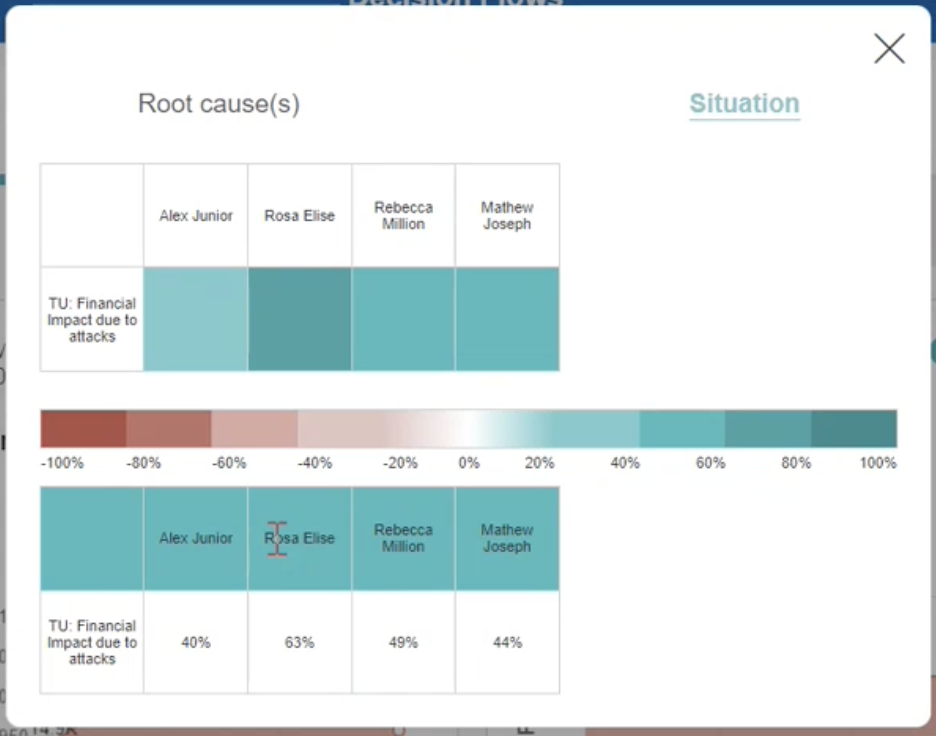

### Score simulation

In [57]:
alex_jr_emp_sat = grouped_data.loc[('Alex', 'Junior')]['Employee satisfaction'][-13:].mean()
math_js_emp_sat = grouped_data.loc[('Mathew', 'Joseph')]['Employee satisfaction'][-13:].mean()
rebe_ml_emp_sat = grouped_data.loc[('Rebecca', 'Million')]['Employee satisfaction'][-13:].mean()
rosa_elise_emp_sat = grouped_data.loc[('Rosa', 'Elise')]['Employee satisfaction'][-13:].mean()

alex_jr_emp_sat, math_js_emp_sat, rebe_ml_emp_sat, rosa_elise_emp_sat

(5.466433566433566, 5.555646481178396, 5.55849358974359, 5.38)

In [58]:
overall_time = df_time['Employee satisfaction'][-13:].mean()

In [59]:
overall_time

5.4878846153846155

In [60]:
expected = 8

In [61]:
expected

8

In [62]:
alex_jr_pending = expected - alex_jr_emp_sat

In [12]:
alex_jr_pending

NameError: name 'alex_jr_pending' is not defined

In [63]:
alex_jr_overall_contrib = (alex_jr_pending/expected)

In [64]:
alex_jr_overall_contrib

0.31669580419580423

In [65]:
alex_jr_overall_contrib_percent_35 = alex_jr_overall_contrib*35/100

In [66]:
overall_improved_score_alex_35 = overall_time + alex_jr_overall_contrib_percent_35

In [67]:
overall_improved_score_alex_35

5.598728146853147

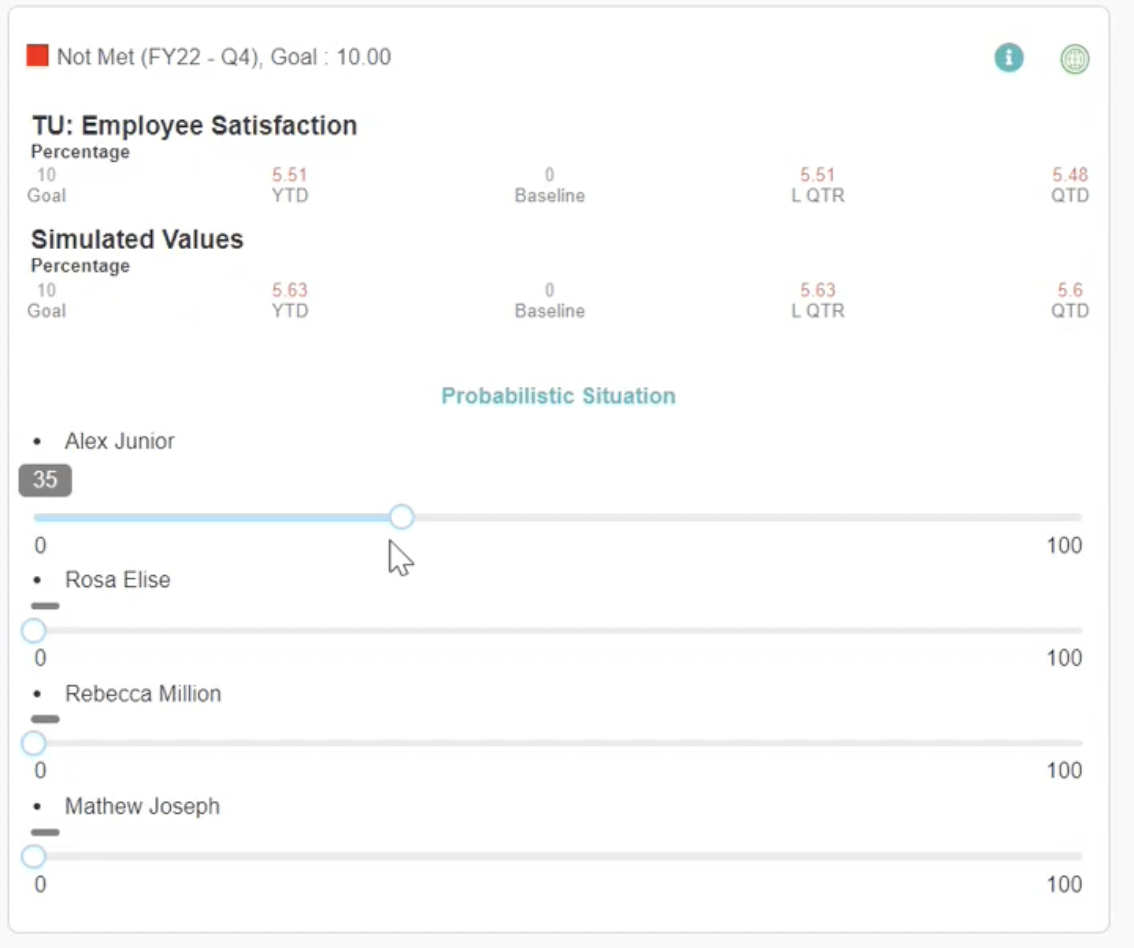

In [ ]:
import numpy as np

x = np.random

## Cross Correlation

In [1]:
import statsmodels.api as sm

In [7]:

correlation_value = sm.tsa.stattools.ccf(df_time['Member acquisition cost (CAC)'], df_time['Mean Time Between Failures (MTBF)'], adjusted=False)

In [11]:
import numpy
numpy.around(correlation_value, decimals=2)

array([-0.39,  0.22, -0.13,  0.08,  0.04,  0.08,  0.06, -0.02,  0.18,
        0.04,  0.09, -0.17,  0.14, -0.29,  0.09, -0.12, -0.07,  0.02,
        0.05,  0.06, -0.18,  0.1 , -0.01,  0.28, -0.06,  0.04, -0.14,
        0.05, -0.09, -0.08,  0.06, -0.02,  0.11, -0.07,  0.11, -0.17,
        0.09, -0.01,  0.01, -0.01,  0.08, -0.05, -0.05, -0.01, -0.02,
        0.04,  0.  , -0.01,  0.  ,  0.01, -0.  , -0.  ])